<a href="https://colab.research.google.com/github/Tejas-1505/Case_Studies/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

### Data Dictionary:

* ‘Unnamed 0’ - Index of the dataset
* Email_hash - Anonymised Personal Identifiable Information (PII)
* Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
* orgyear - Employment start date
* CTC - Current CTC
* Job_position - Job profile in the company
* CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)

### Concept Used:

Manual Clustering
Unsupervised Clustering - K- means, Hierarchical Clustering

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,FullStack Engineer,2019.0


In [ ]:
df.shape

(105462, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105462 entries, 0 to 105461
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        105462 non-null  int64  
 1   company_hash      105437 non-null  object 
 2   email_hash        105462 non-null  object 
 3   orgyear           105406 non-null  float64
 4   ctc               105461 non-null  float64
 5   job_position      76653 non-null   object 
 6   ctc_updated_year  105461 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ MB


#### Checking null values in dataset

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
company_hash,25
email_hash,0
orgyear,56
ctc,1
job_position,28809
ctc_updated_year,1


Data contains null values in 3 columns : [company_hash, orgyear, job_position]

<b> Checking for Duplicate Rows in dataset</b>

In [ ]:
len(df[df.duplicated()])

0

No duplicated rows in dataset

Data Pre processing

<b>Checking duplicated PII ids in column email_hash</b>

In [ ]:
df['email_hash'].value_counts().head(10)

,count
email_hash,
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,7
94b5594a8a0757a23c4521a09b19ff3de75ec1f5da6f7ee85069364711107f07,7
a7783035a9c89059383053ae533f6004e580c82eac0e657112d8275145fedf03,7
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,7
aacf9473e3cee3e3f7c322e49bb8a6d5346bb05f3ff5bb9e9ac3ae22729ab933,7
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,6
3e05034627fbc5291cad9ce7e0e66d3b8b45197a15f11afdd8a1345d1f840bb6,6
3634ed9e6f97396fd28422a4931f053630ee52be79bd50e3827b174ba11c0a6b,6
dfdf713524e5de58b10ee1700c976e18a32635e5f57867e958255aeb0f7a150a,6


In [ ]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000.0,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000.0,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000.0,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000.0,FullStack Engineer,2020.0


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000.0,QA Engineer,2020.0
10002,10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000.0,Devops Engineer,2020.0
10583,10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000.0,Backend Engineer,2020.0
12784,12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000.0,Other,2020.0
20715,20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000.0,SDET,2020.0


 Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible.<br><bbr>
We will take the first row in case of duplicated PII ids.

In [ ]:
df = df.groupby('email_hash').first().reset_index()

<b>Creating null value indicator columns (Feature Engineering)</b>

In [ ]:
df['company_hash_null'] = df['company_hash'].isna()
df['orgyear_null'] = df['orgyear'].isna()
df['job_position_null'] = df['job_position'].isna()

display(df.head())

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_null,orgyear_null,job_position_null
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,bxwqgogen,2012.0,3500000.0,Backend Engineer,2019.0,False,False,False
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,nqsn axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,False,False,False
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,gunhb,2021.0,1300000.0,None,2019.0,False,False,True
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,bxwqgotbx wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,False,False,False
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,947,nvnv wgzohrnvzwj otqcxwto,2018.0,380000.0,Database Administrator,2020.0,False,False,False


Cleaning text columns

In [ ]:
import re
text_cols = ['company_hash']
for i in text_cols:
    df[i] = df[i].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

<b>Creating new columns (Feature Engineering)</b>

In [ ]:
df['YoE'] = df['ctc_updated_year'] - df['orgyear']

In [ ]:
feat = 'company_hash'
df[feat] = df[feat].fillna('na')
enc = (df.groupby(feat).size()) / len(df)
df[feat+'_encode'] = df[feat].apply(lambda x : enc[x])

feat = 'job_position'
df[feat] = df[feat].fillna('na')
enc = (df.groupby(feat).size()) / len(df)*10000
df[feat+'_encode'] = df[feat].apply(lambda x : enc[x])

<b>Outlier treatment</b>

In [ ]:
sorted(df['orgyear'].fillna(0).astype(int).unique())

[np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(91),
 np.int64(206),
 np.int64(208),
 np.int64(209),
 np.int64(1970),
 np.int64(1971),
 np.int64(1972),
 np.int64(1973),
 np.int64(1976),
 np.int64(1977),
 np.int64(1981),
 np.int64(1982),
 np.int64(1985),
 np.int64(1986),
 np.int64(1987),
 np.int64(1988),
 np.int64(1989),
 np.int64(1990),
 np.int64(1991),
 np.int64(1992),
 np.int64(1993),
 np.int64(1994),
 np.int64(1995),
 np.int64(1996),
 np.int64(1997),
 np.int64(1998),
 np.int64(1999),
 np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024),
 np.int64(2025),
 np.int64(2026),
 np.int64(2027),


In [ ]:
df = df[~df['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900, 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165])]

In [ ]:
df = df[~(df['YoE']<0)]

## EDA

### Univariate Analysis

Plot categorical columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79389 entries, 0 to 82960
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   email_hash           79389 non-null  object 
 1   Unnamed: 0           79389 non-null  int64  
 2   company_hash         79389 non-null  object 
 3   orgyear              79335 non-null  float64
 4   ctc                  79388 non-null  float64
 5   job_position         79389 non-null  object 
 6   ctc_updated_year     79388 non-null  float64
 7   company_hash_null    79389 non-null  bool   
 8   orgyear_null         79389 non-null  bool   
 9   job_position_null    79389 non-null  bool   
 10  YoE                  79335 non-null  float64
 11  company_hash_encode  79389 non-null  float64
 12  job_position_encode  79389 non-null  float64
dtypes: bool(3), float64(6), int64(1), object(3)
memory usage: 6.9+ MB


In [ ]:
cat_cols = [ 'email_hash','company_hash','job_position']

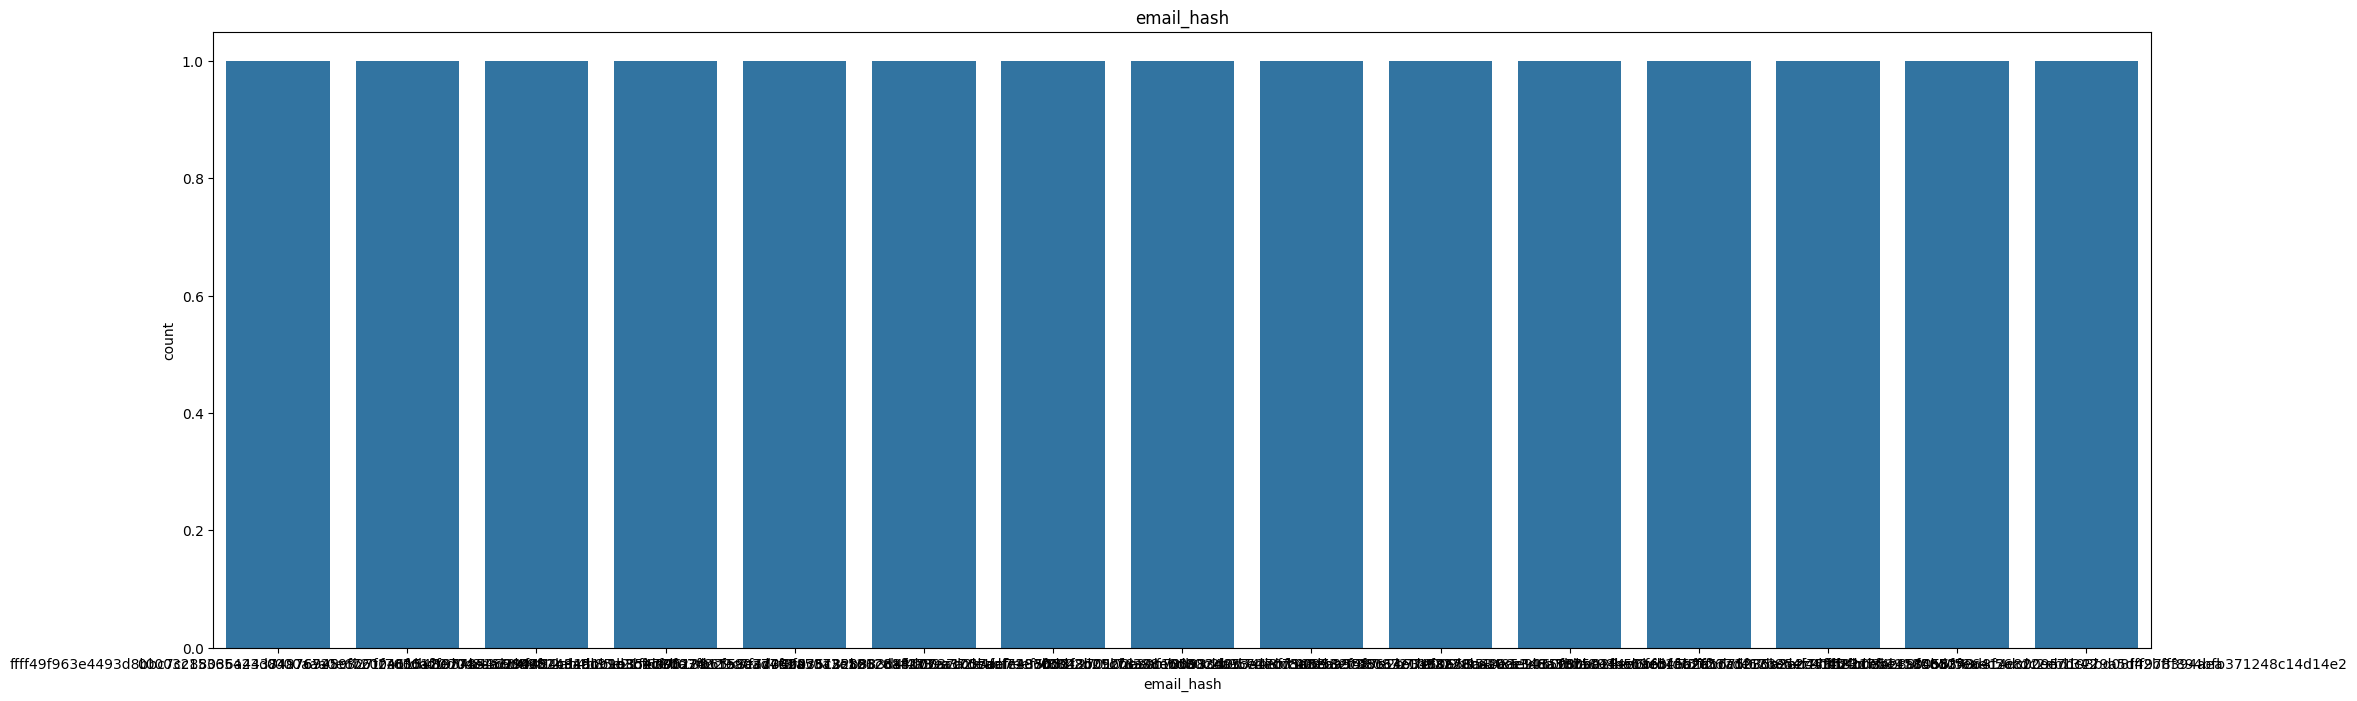

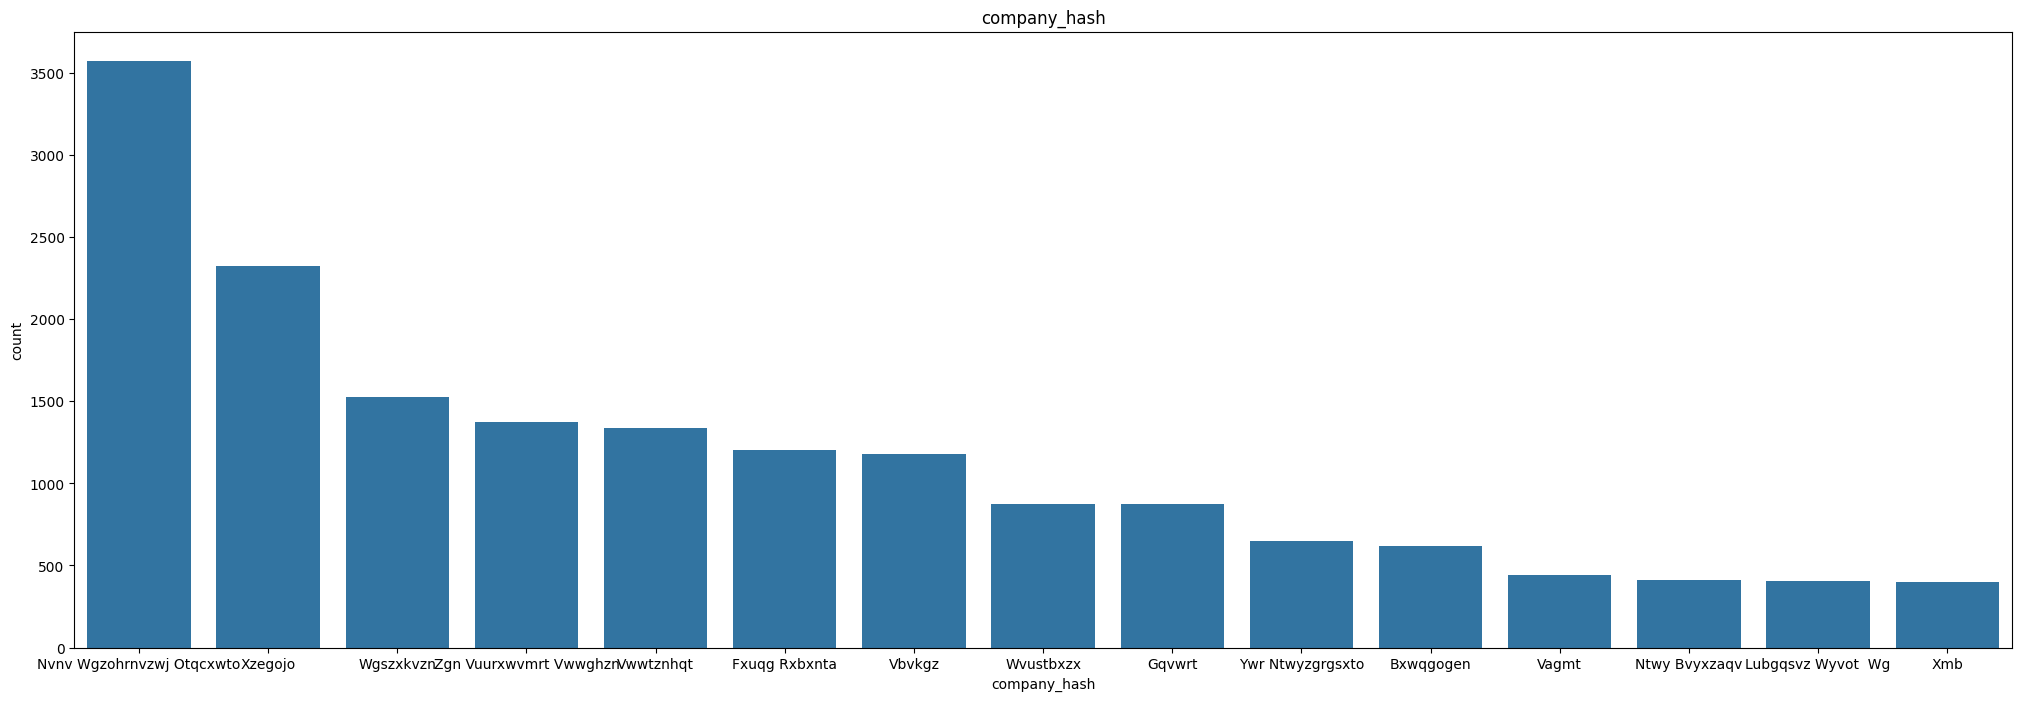

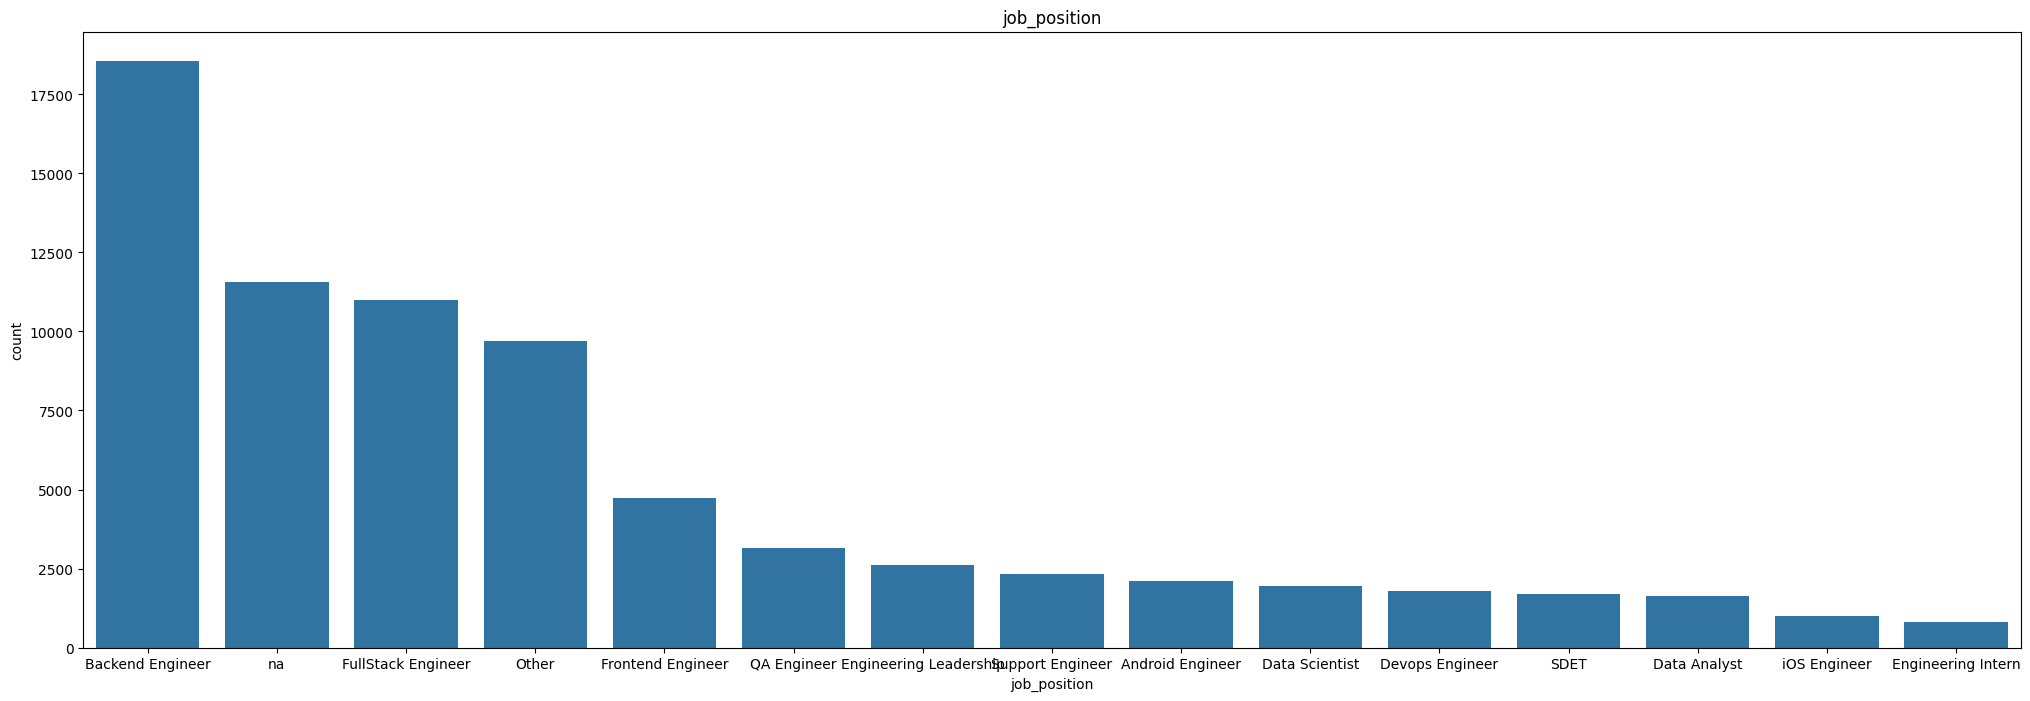

In [ ]:
for i in cat_cols:
    tmp = df.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,8))
    sns.barplot(data=tmp,y='count',x=i).set(title=i)

    plt.show()

<b>Plotting Continuous Features</b>

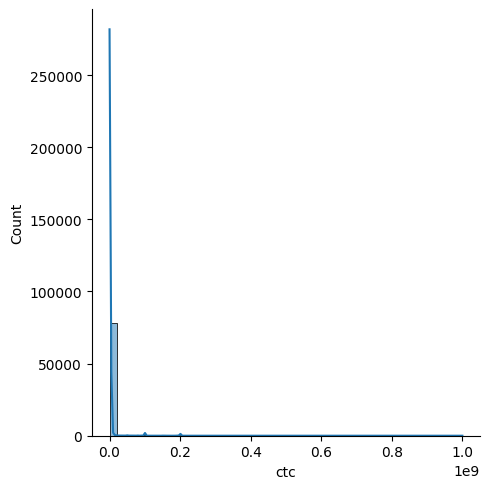

In [ ]:
sns.displot(df['ctc'],kde=True,bins=50)
plt.show()

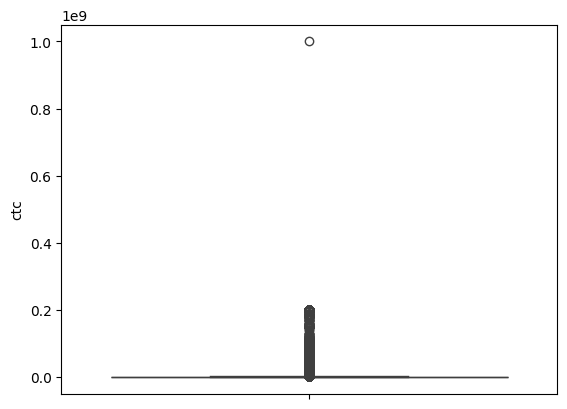

In [ ]:
v = df['ctc']
#v = (v-v.mean())/v.std()
sns.boxplot(v)
plt.show()

In [ ]:
df.sort_values(['ctc']).iloc[1000:1020,:]

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_null,orgyear_null,job_position_null,YoE,company_hash_encode,job_position_encode
33706,68603e4bec63be266ffd855c0fa959e939a03d645dfaae...,81807,Wxnctqxwvoy,2016.0,60000.0,Backend Engineer,2021.0,False,False,False,5.0,0.000012,2297.947228
56147,add2ea657c1d292ab77cc2fe8a3f5f66709bcfd1de3657...,22261,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,60000.0,QA Engineer,2020.0,False,False,False,2.0,0.045130,382.348332
61891,bf8d3b27bc42bd6de1abe4160aea873896394f9f2bf83a...,47504,Zvz,2020.0,60000.0,na,2020.0,False,False,True,0.0,0.005183,1540.723955
56840,afe1a492d53cbd2f5820140bacc6d52378a4a1df95baa0...,78220,Ogenqhwp Mqvoxr Atotzcgrcxbtzng At Ogenfvqt,2016.0,60000.0,Backend Engineer,2017.0,False,False,False,1.0,0.000012,2297.947228
24923,4d7fea62269e1f6105f9ac52ca319a738c199b0d7f59d9...,91245,Vzjrxzt,2017.0,60000.0,Research Engineers,2020.0,False,False,False,3.0,0.000012,68.948060
65275,c9fb5c6f3404ad1ea624a6a4ad528d0b6482b00ba3be21...,54119,Wgat Wvbu,2017.0,60000.0,iOS Engineer,2017.0,False,False,False,0.0,0.000012,123.793108
33450,6788fe95dcb4db32d5209adc2e5f12dfe369f3ba355a31...,29067,Mhooxztoowggqaxzvngqo Xzw,2019.0,60000.0,FullStack Engineer,2021.0,False,False,False,2.0,0.000012,1375.465580
51062,9e5eca5276981bc742afd36fab1ef359633d81f60af9a9...,52490,Sqvjagz Hp,2010.0,60000.0,Data Scientist,2019.0,False,False,False,9.0,0.000012,247.706754
2745,0849f1f55afe684dcb52e2a1ffff4d9a84aaae06b89a2b...,99653,Gznvqstn Xzw,2013.0,60000.0,Backend Engineer,2020.0,False,False,False,7.0,0.000012,2297.947228
75012,e7ebd5419e237359e160c466f869afc14b193ce285620e...,11552,Ptvongzt Ntwyzgrgsxto,2011.0,60000.0,Engineering Leadership,2019.0,False,False,False,8.0,0.000012,323.043358


In [ ]:
df = df[df['ctc'] >702475]

Outlier treatment

In [ ]:
dftmp = df.copy()
print(dftmp.shape)
cols = ['ctc'] # one or more

Q1 = dftmp[cols].quantile(0.25)
Q3 = dftmp[cols].quantile(0.75)
IQR = Q3 - Q1

dftmp = dftmp[~((dftmp[cols] < (Q1 - 1.5 * IQR)) |(dftmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dftmp.shape)

(46315, 13)
(42214, 13)


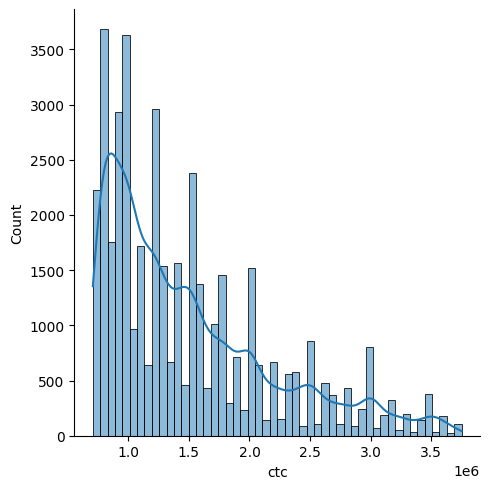

In [ ]:
v = dftmp['ctc']
sns.displot(v,kde=True,bins=50)
plt.show()

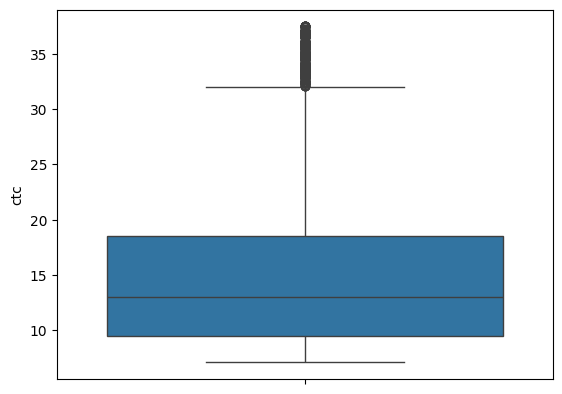

In [ ]:
v = dftmp['ctc']/100000
sns.boxplot(v)
plt.show()

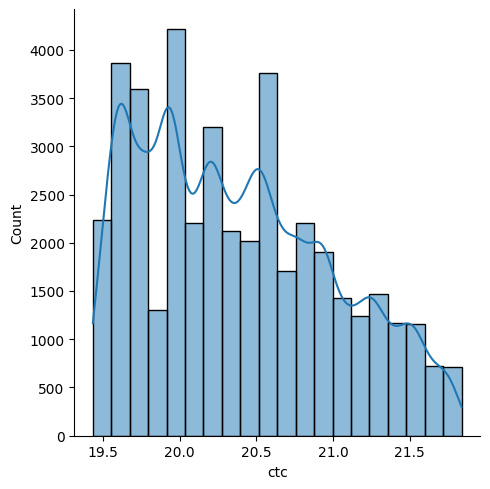

In [ ]:
v = np.log2(dftmp['ctc'])
sns.displot(v,kde=True,bins=20)
plt.show()

## Multivariate analysis

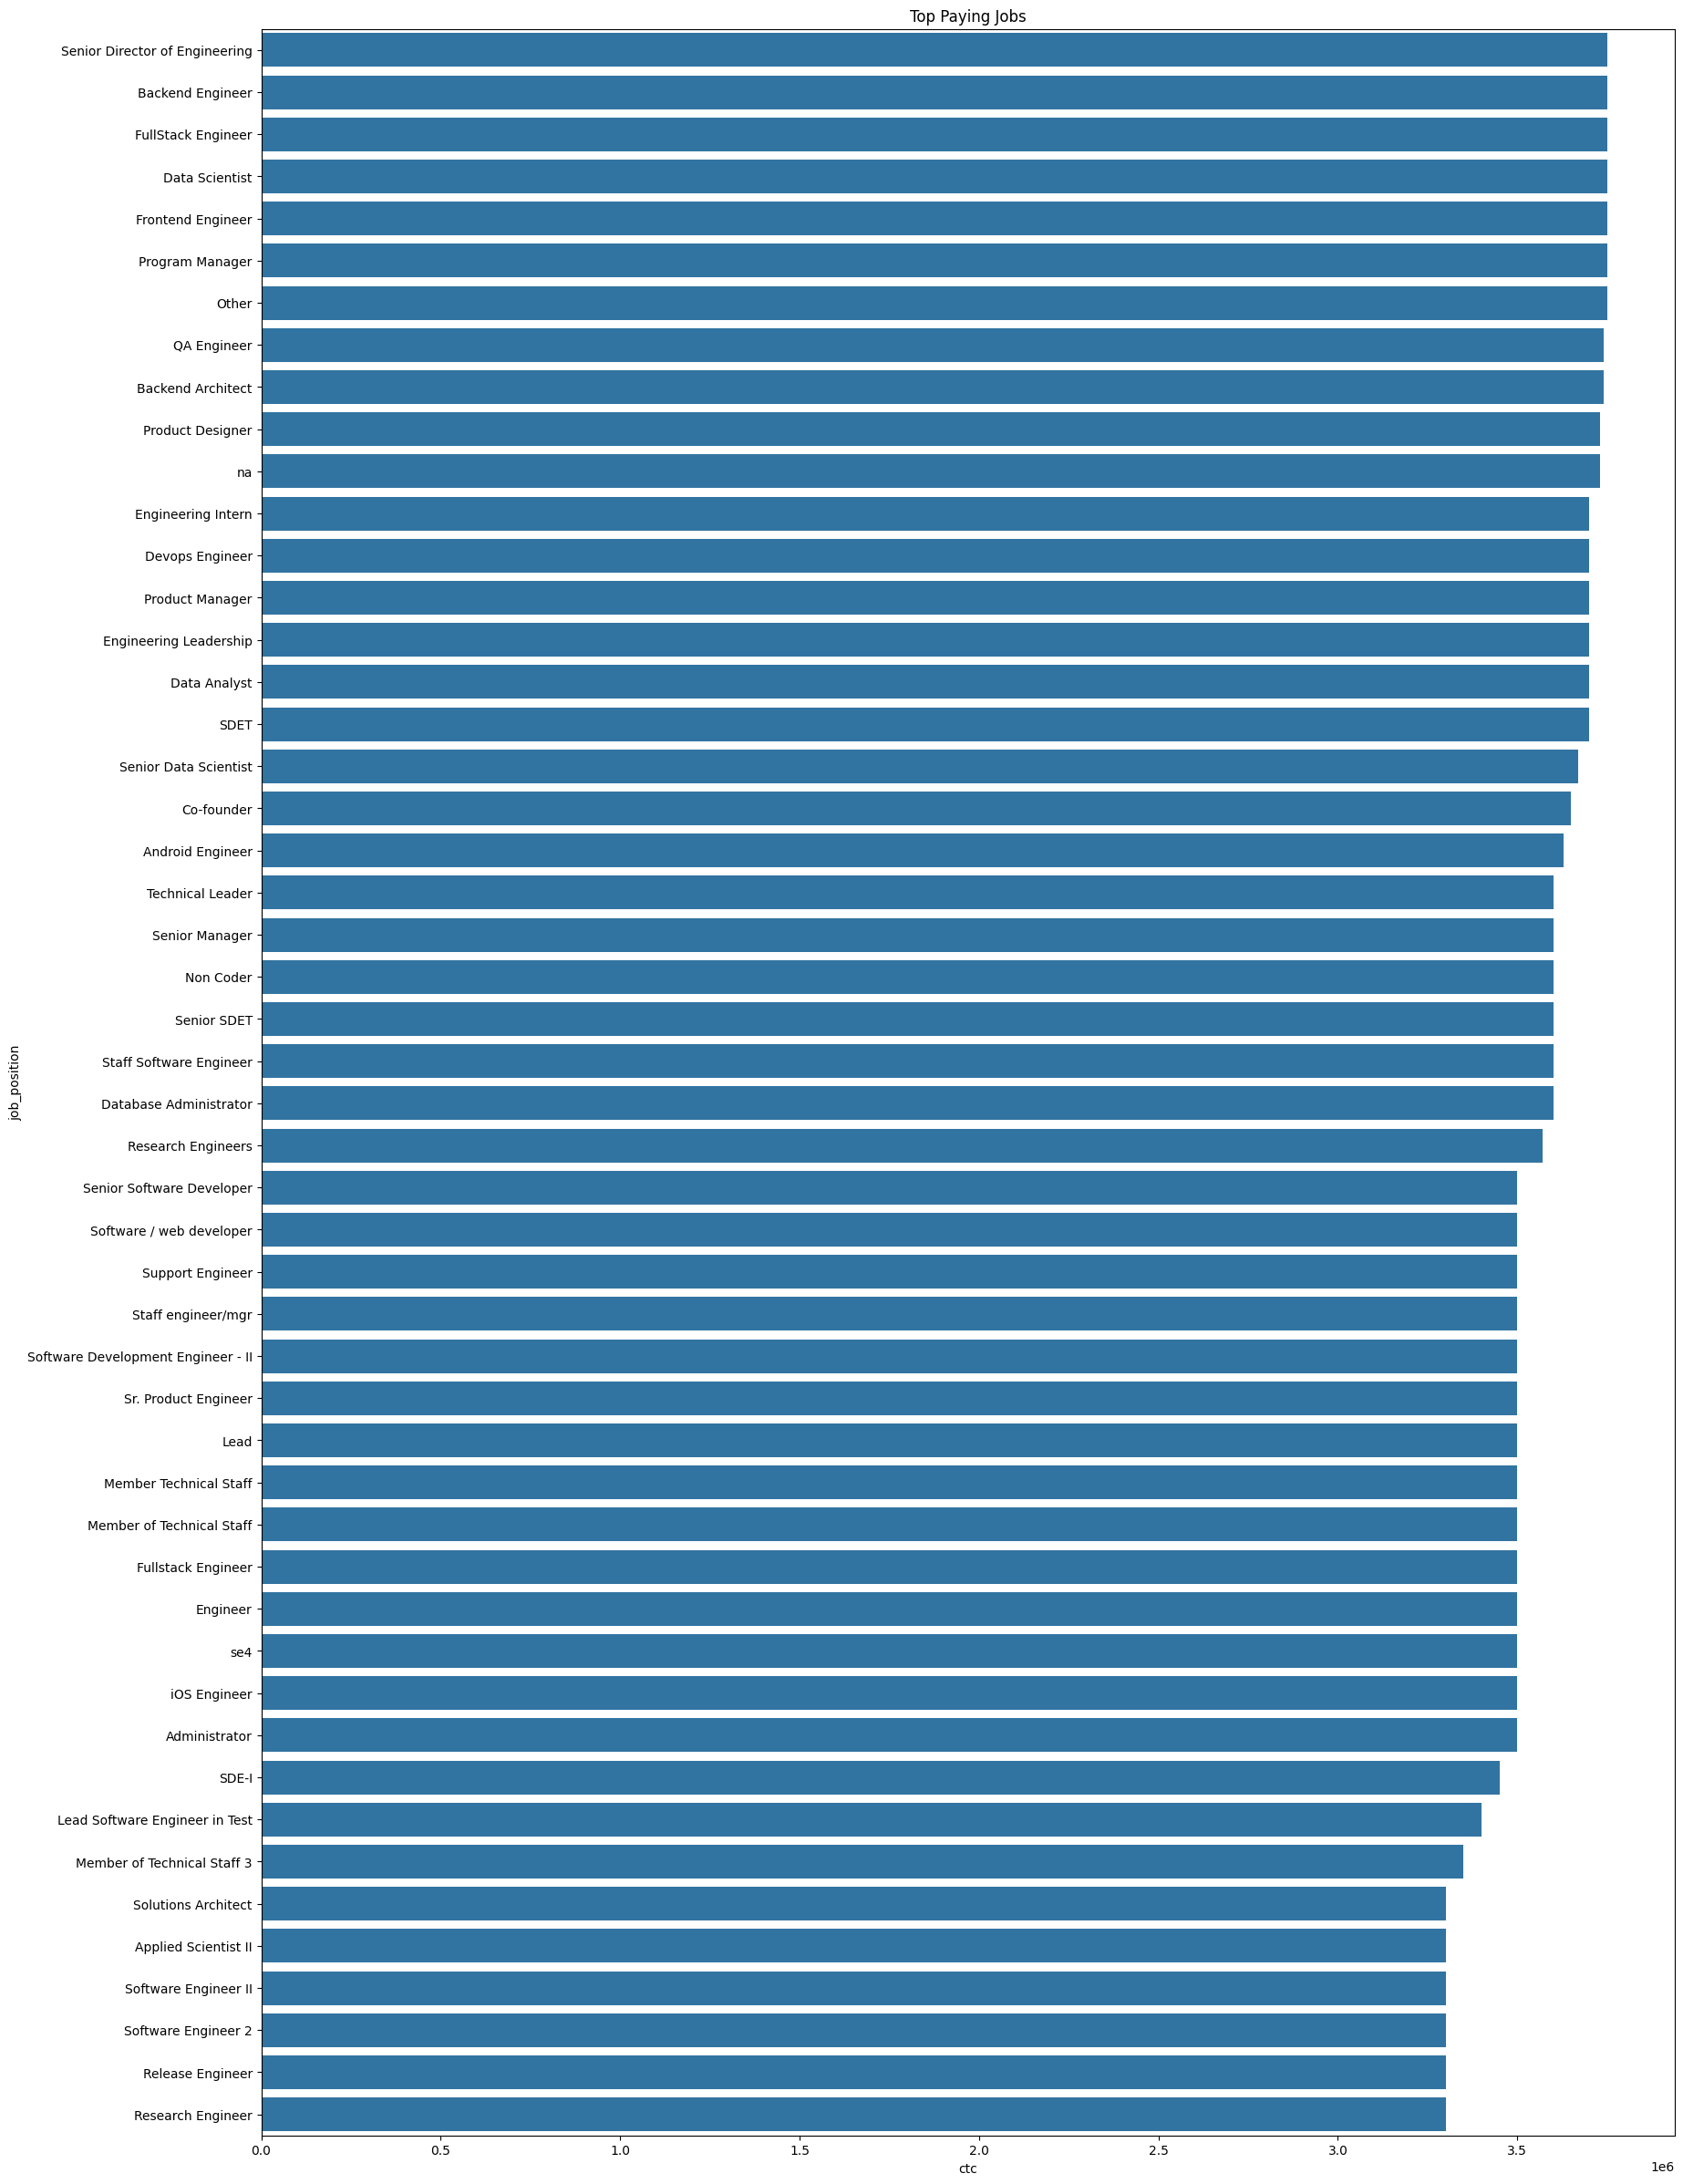

['Senior Director of Engineering',
 'Backend Engineer',
 'FullStack Engineer',
 'Data Scientist',
 'Frontend Engineer',
 'Program Manager',
 'Other',
 'QA Engineer',
 'Backend Architect',
 'Product Designer',
 'na',
 'Engineering Intern',
 'Devops Engineer',
 'Product Manager',
 'Engineering Leadership',
 'Data Analyst',
 'SDET',
 'Senior Data Scientist',
 'Co-founder',
 'Android Engineer',
 'Technical Leader',
 'Senior Manager',
 'Non Coder',
 'Senior SDET',
 'Staff Software Engineer',
 'Database Administrator',
 'Research Engineers',
 'Senior Software Developer',
 'Software / web developer',
 'Support Engineer',
 'Staff engineer/mgr',
 'Software Development Engineer - II',
 'Sr. Product Engineer',
 'Lead',
 'Member Technical Staff',
 'Member of Technical Staff',
 'Fullstack Engineer',
 'Engineer',
 'se4',
 'iOS Engineer',
 'Administrator',
 'SDE-I',
 'Lead Software Engineer in Test',
 'Member of Technical Staff 3',
 'Solutions Architect',
 'Applied Scientist II',
 'Software Engineer 

In [ ]:
tmp = dftmp.copy()
tmp = tmp.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='job_position').set(title="Top Paying Jobs")
plt.show()
list(tmp['job_position'])

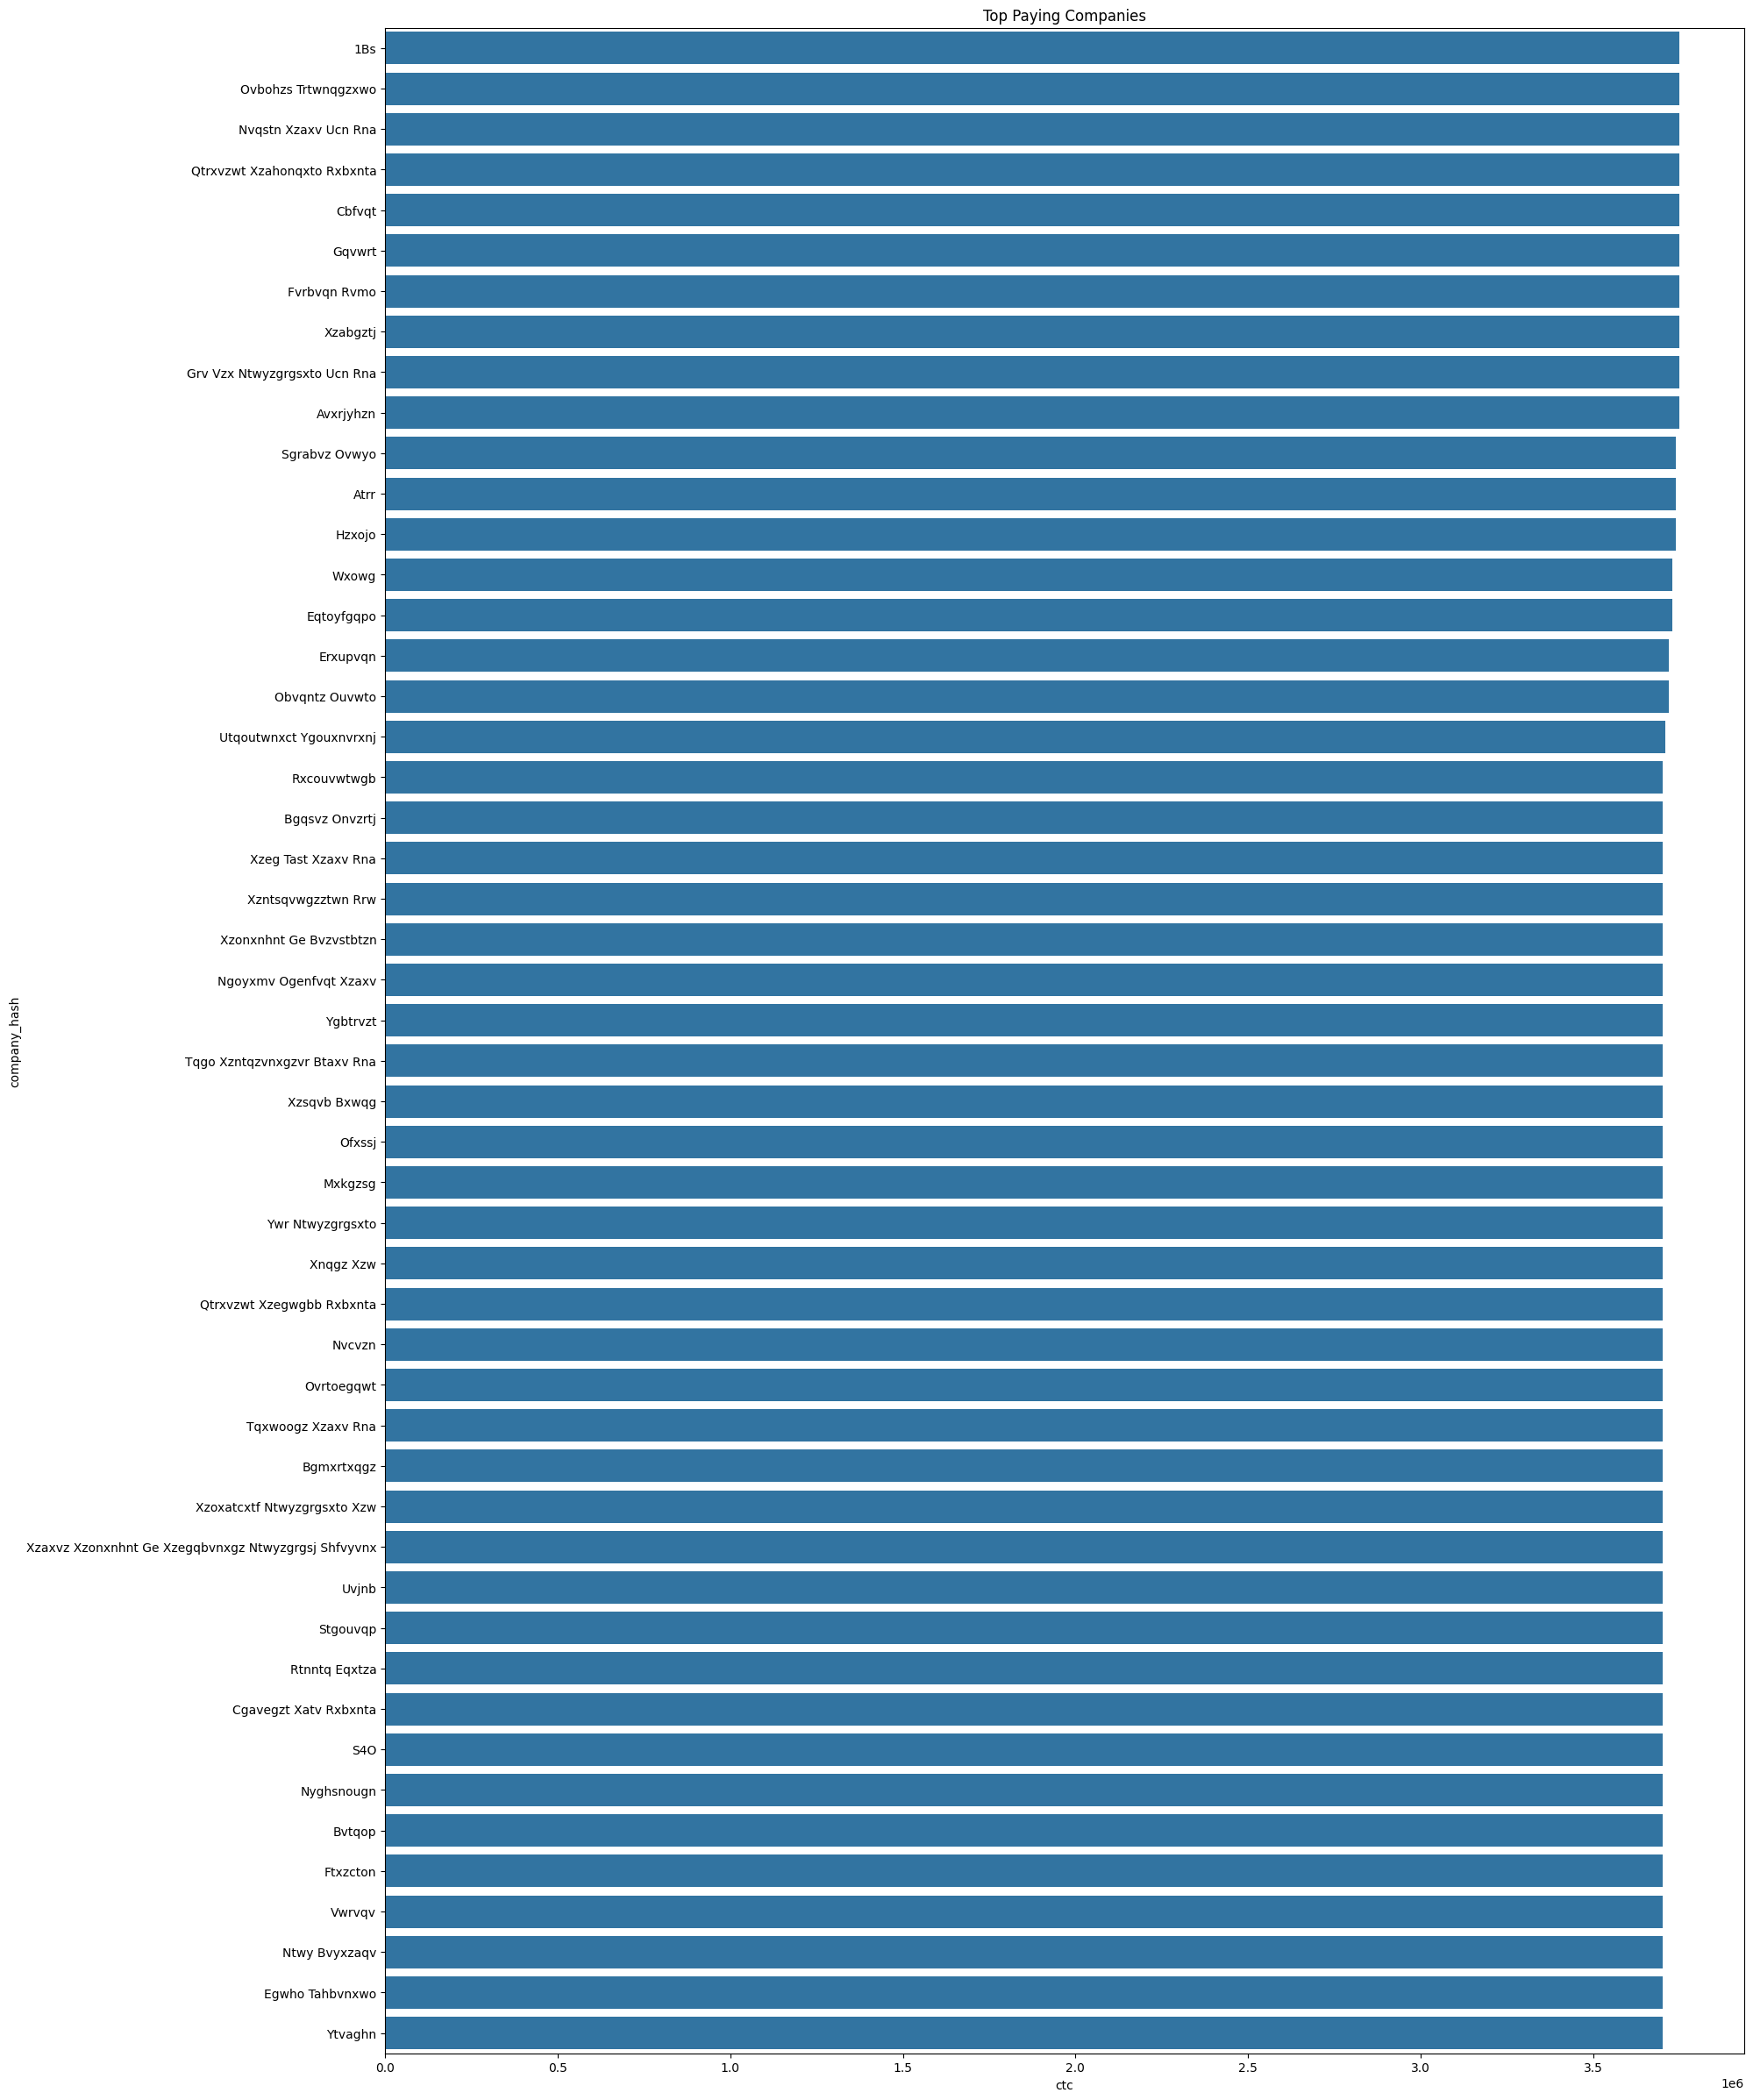

['1Bs',
 'Ovbohzs Trtwnqgzxwo',
 'Nvqstn Xzaxv Ucn Rna',
 'Qtrxvzwt Xzahonqxto Rxbxnta',
 'Cbfvqt',
 'Gqvwrt',
 'Fvrbvqn Rvmo',
 'Xzabgztj',
 'Grv Vzx Ntwyzgrgsxto Ucn Rna',
 'Avxrjyhzn',
 'Sgrabvz Ovwyo',
 'Atrr',
 'Hzxojo',
 'Wxowg',
 'Eqtoyfgqpo',
 'Erxupvqn',
 'Obvqntz Ouvwto',
 'Utqoutwnxct Ygouxnvrxnj',
 'Rxcouvwtwgb',
 'Bgqsvz Onvzrtj',
 'Xzeg Tast Xzaxv Rna',
 'Xzntsqvwgzztwn Rrw',
 'Xzonxnhnt Ge Bvzvstbtzn',
 'Ngoyxmv Ogenfvqt Xzaxv',
 'Ygbtrvzt',
 'Tqgo Xzntqzvnxgzvr Btaxv Rna',
 'Xzsqvb Bxwqg',
 'Ofxssj',
 'Mxkgzsg',
 'Ywr Ntwyzgrgsxto',
 'Xnqgz Xzw',
 'Qtrxvzwt Xzegwgbb Rxbxnta',
 'Nvcvzn',
 'Ovrtoegqwt',
 'Tqxwoogz Xzaxv Rna',
 'Bgmxrtxqgz',
 'Xzoxatcxtf Ntwyzgrgsxto Xzw',
 'Xzaxvz Xzonxnhnt Ge Xzegqbvnxgz Ntwyzgrgsj Shfvyvnx',
 'Uvjnb',
 'Stgouvqp',
 'Rtnntq Eqxtza',
 'Cgavegzt Xatv Rxbxnta',
 'S4O',
 'Nyghsnougn',
 'Bvtqop',
 'Ftxzcton',
 'Vwrvqv',
 'Ntwy Bvyxzaqv',
 'Egwho Tahbvnxwo',
 'Ytvaghn']

In [ ]:
tmp = dftmp.copy()
tmp = tmp.groupby(['company_hash']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='company_hash').set(title="Top Paying Companies")
plt.show()

list(tmp['company_hash'])

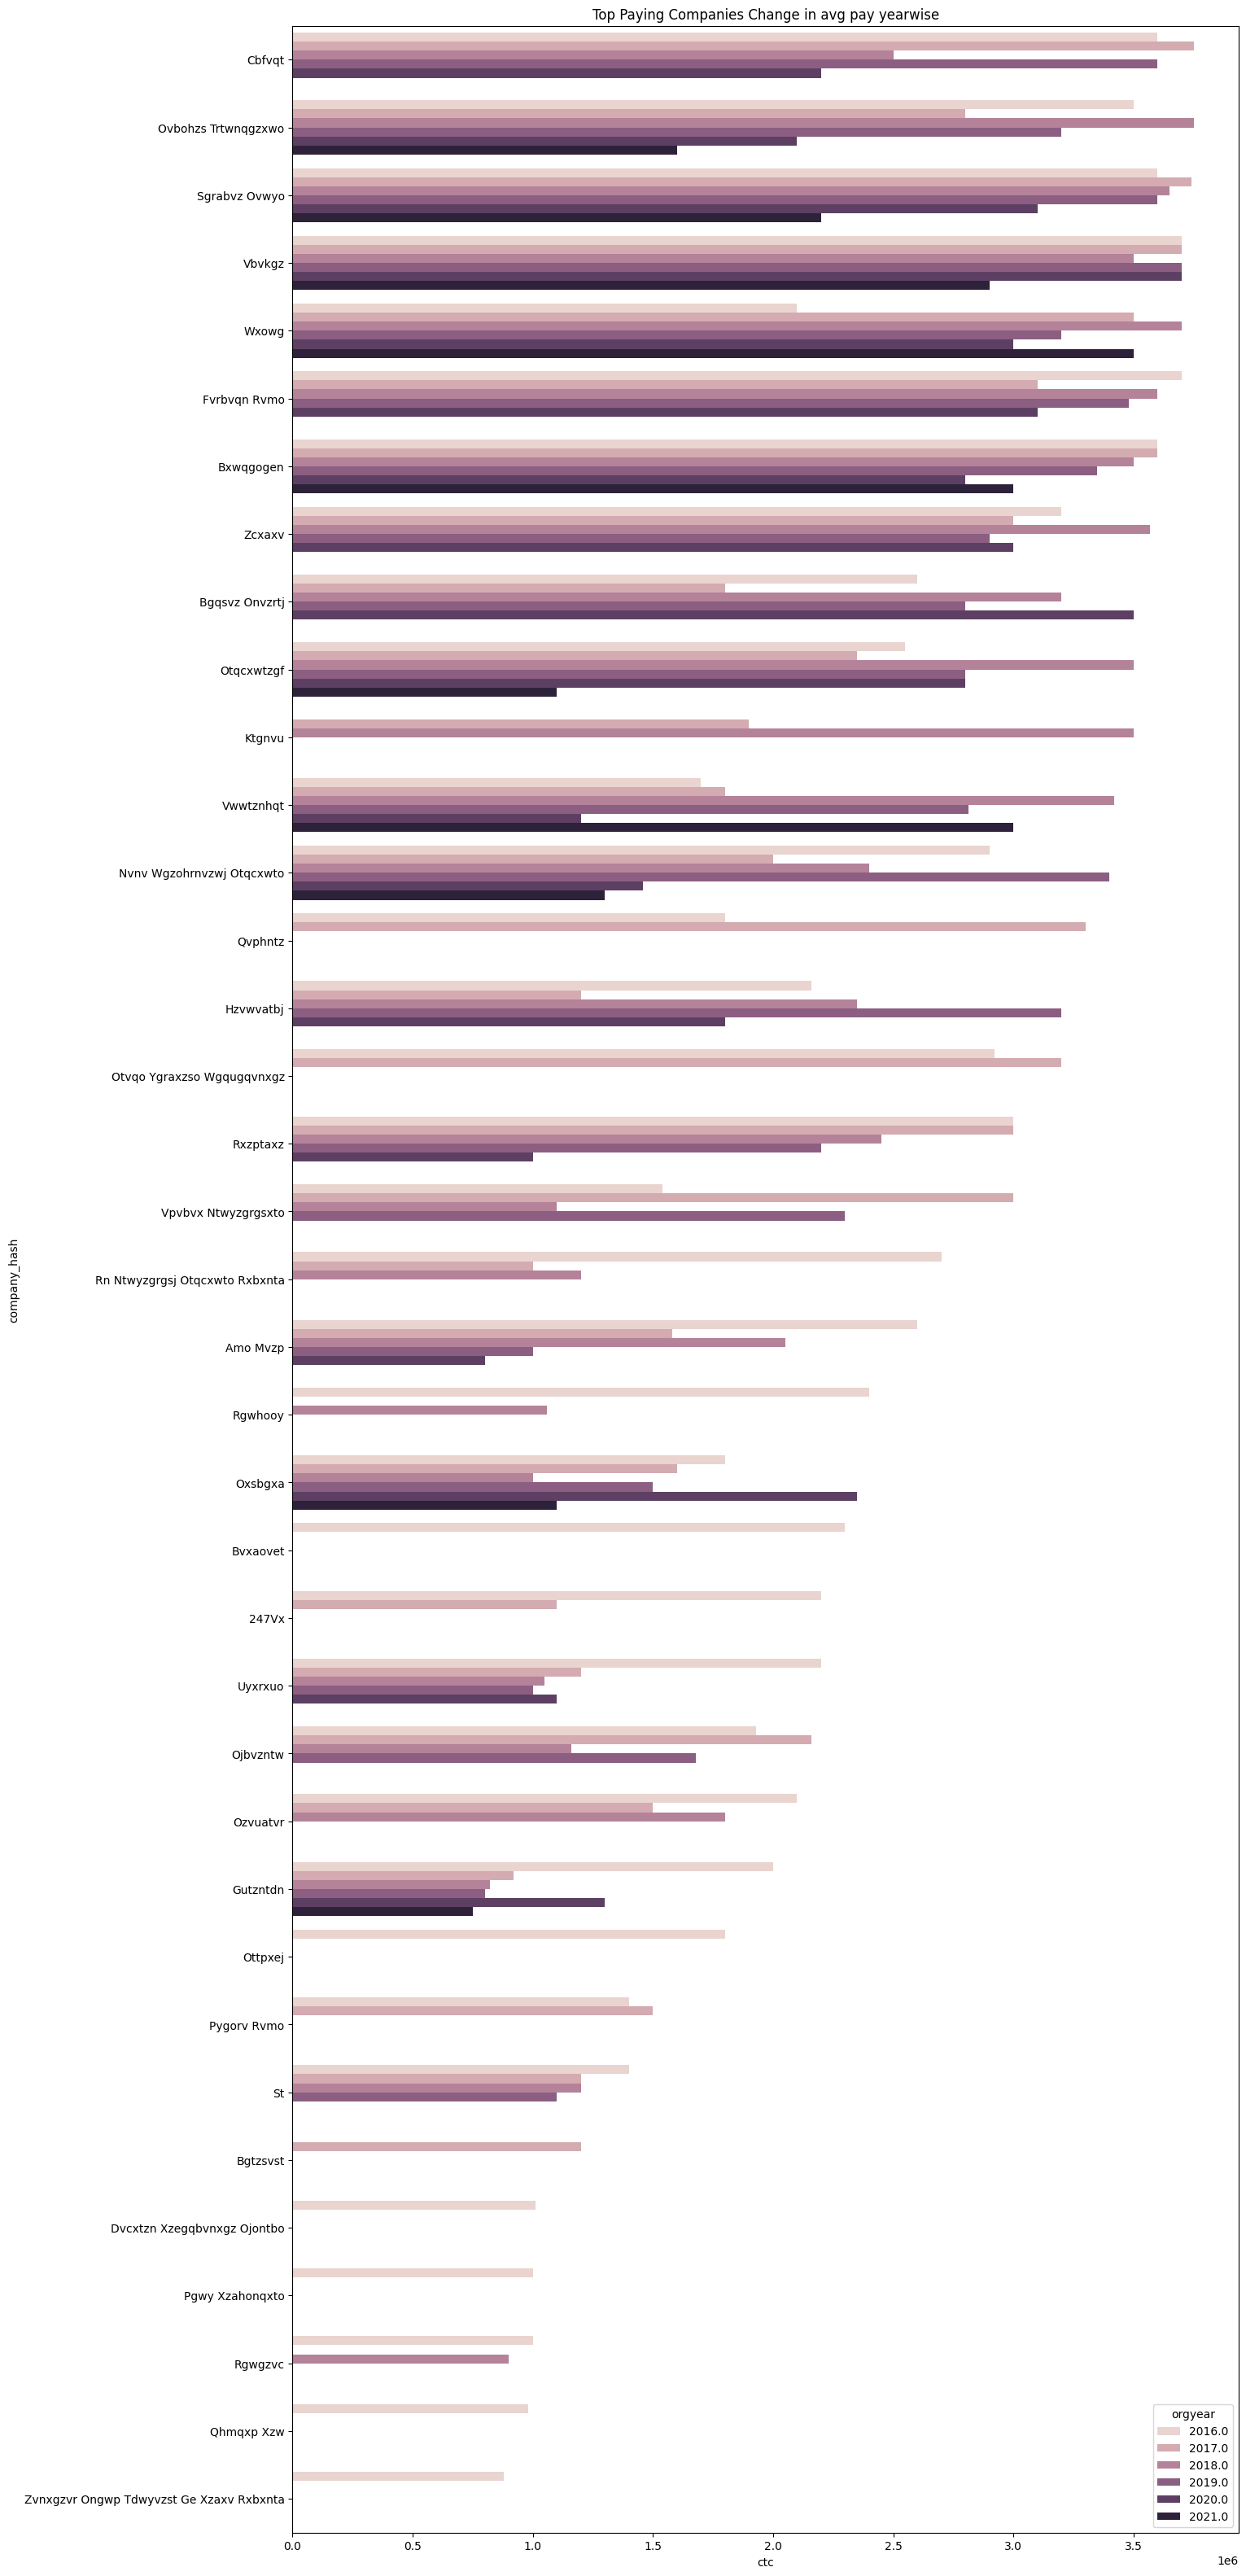

In [ ]:
tmp = dftmp.copy()
tmp = tmp[tmp['company_hash'].isin(['Qhmqxp Xzw',
 'Ozvuatvr',
 'Wxowg',
 'Ovrnoxat Ntwyzgrgsj',
 'Ovbohzs Trtwnqgzxwo',
 'Owyztxatq Trtwnqxw Xzaxv',
 'Ojbvzntw',
 'Uyxrxuo',
 'Xzntr Ntwyzgrgsj Xzaxv Ucn Rna',
 'Tqxwoogz Qa Mvzsvrgqt',
 'Ktgnvu',
 'Sgrabvz Ovwyo',
 'Bgqsvz Onvzrtj',
 'Fvrbvqn Rvmo',
 'Vbvkgz',
 'Ojbvzntw Ogenfvqt Ogrhnxgzo',
 'Vruyvsqtu Otwhqxnxto',
 'Ottpxej',
 'Zcxaxv',
 'Nvnv Wgzohrnvzwj Otqcxwto',
 'Bxwqgogen',
 'Amo Mvzp',
 'St',
 'Bgtzsvst',
 'Vpvbvx Ntwyzgrgsxto',
 'Cbfvqt',
 'Rxzptaxz',
 'Otqcxwtzgf',
 'Zvsqv Cxoxgz Xzaxv Uqxcvnt Rxbxnta',
 'Otvqo Ygraxzso Wgqugqvnxgz',
 'Qvphntz',
 'Xaew Mvzp Rna',
 'Rn Ntwyzgrgsj Otqcxwto Rxbxnta',
 'Rgwgzvc',
 'Rgwhooy',
 'Wxnqxd Ojontbo',
 'Urvjsvbto 247',
 'Oxsbgxa',
 'Owm',
 'Zvnxgzvr Ongwp Tdwyvzst Ge Xzaxv Rxbxnta',
 '247Vx',
 'Vwwtznhqt',
 'Wxowg Ojontbo Xzaxv Uqxcvnt Rxbxnta',
 'Hzvwvatbj',
 'Gutzntdn',
 'Pygorv Rvmo',
 'Pgwy Xzahonqxto',
 'Dvcxtzn Xzegqbvnxgz Ojontbo',
 'Bvxaovet',
 'Rgctmgzxng'])]
tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['company_hash','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=tmp,x='ctc',y='company_hash',hue='orgyear').set(title="Top Paying Companies Change in avg pay yearwise")
plt.show()

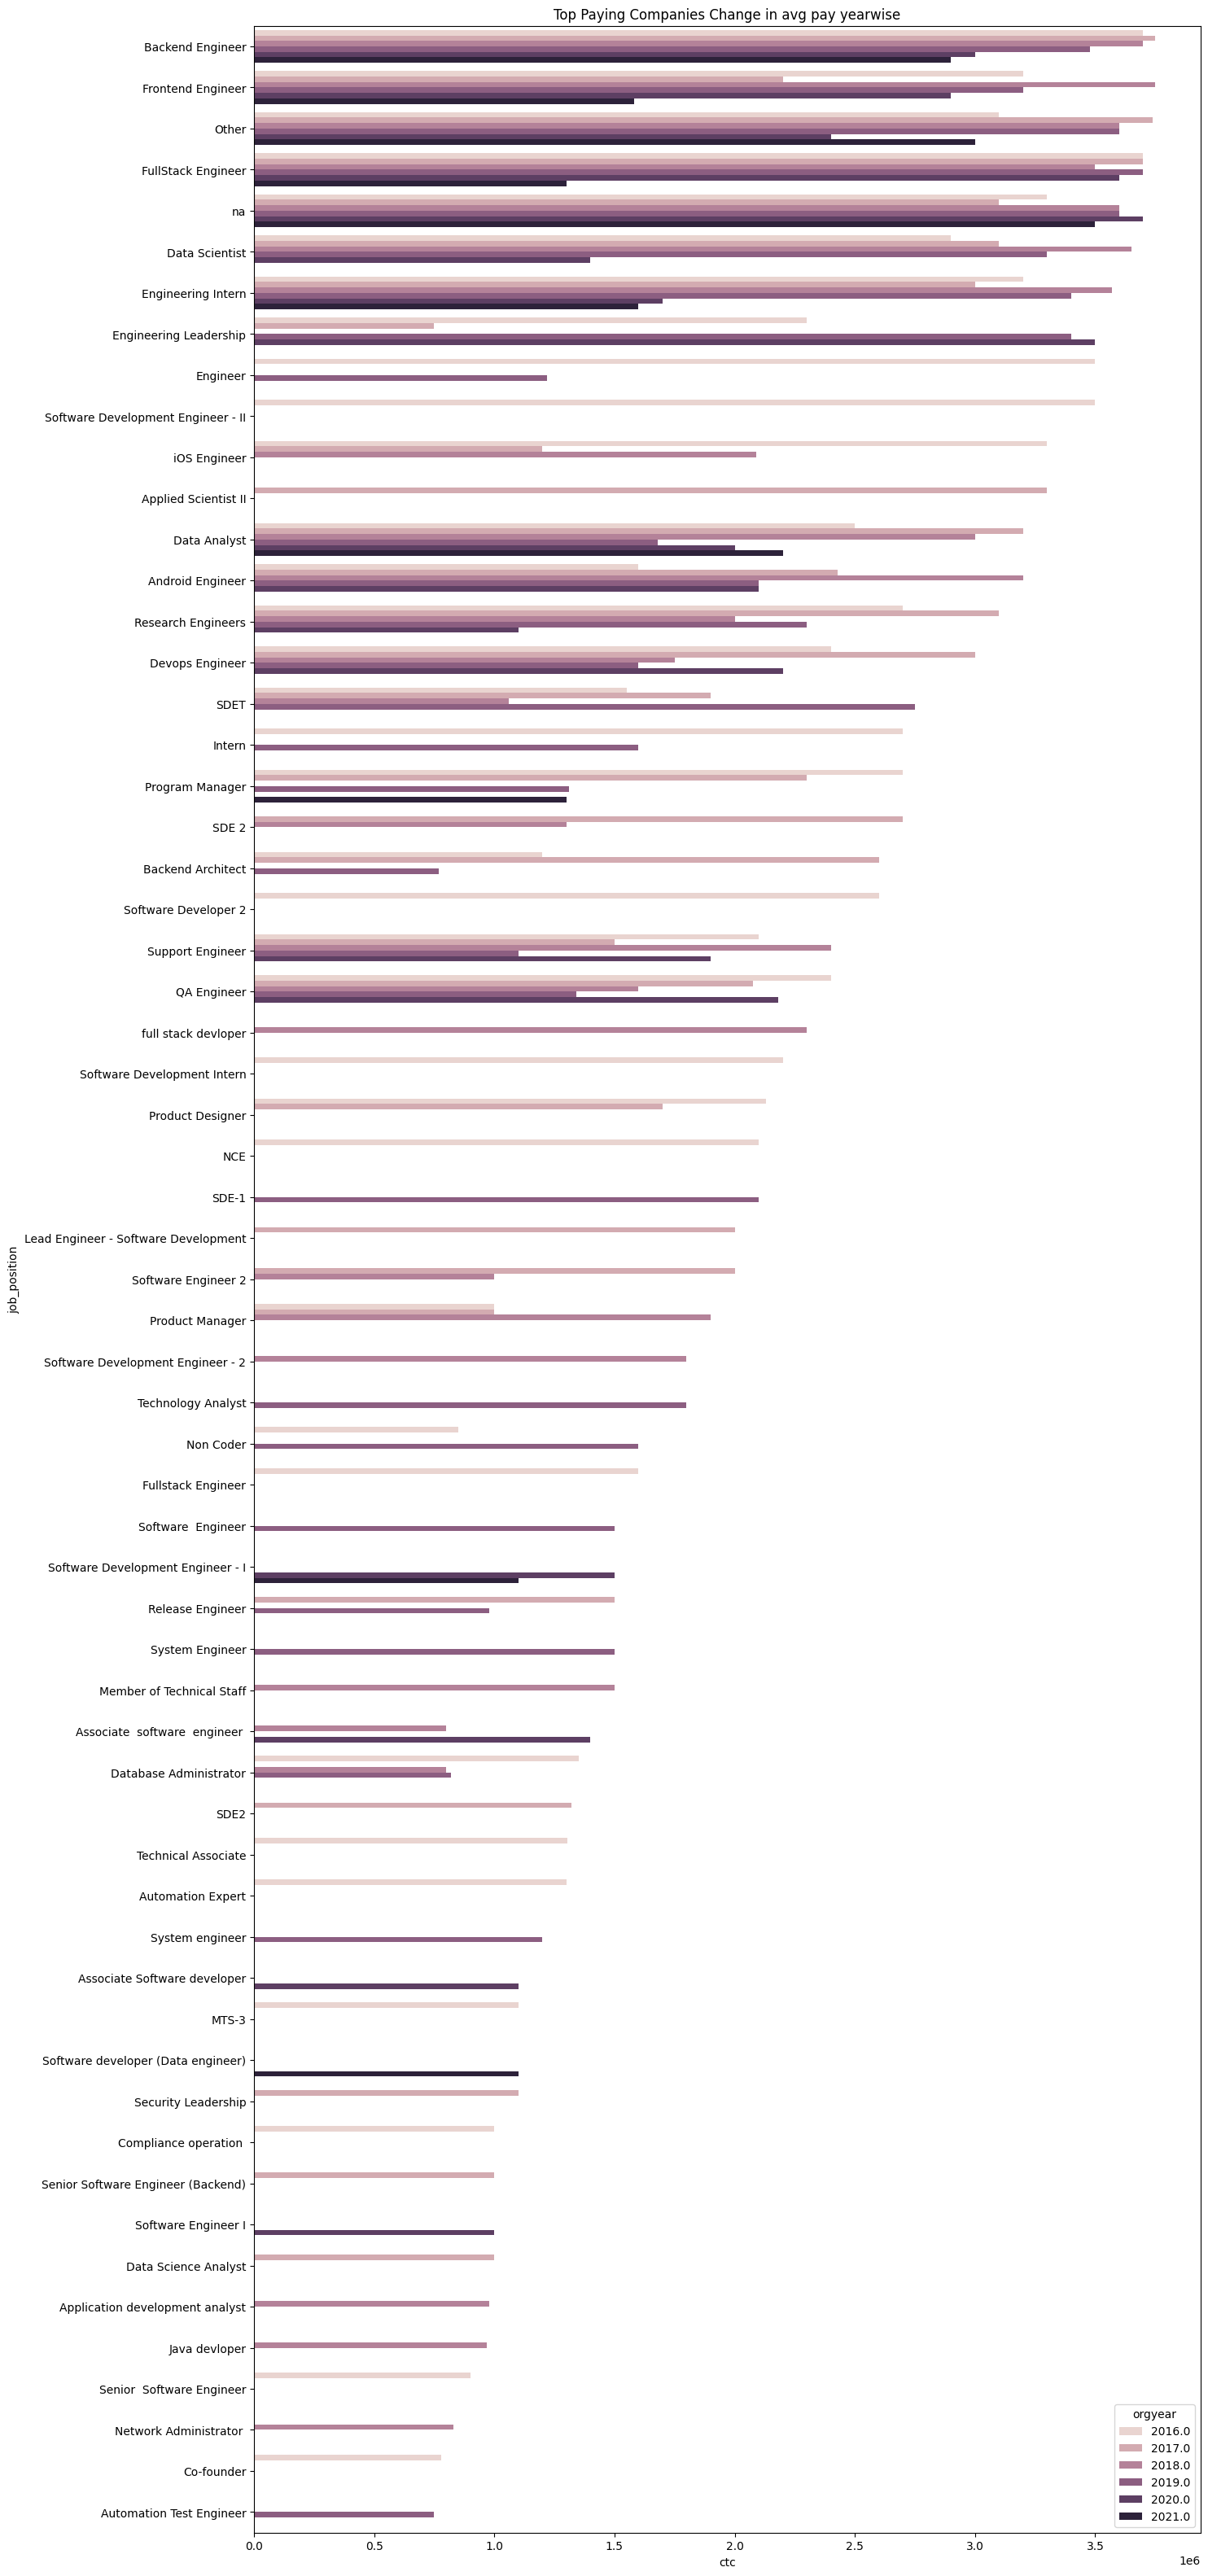

In [ ]:
tmp = dftmp.copy()
tmp = tmp[tmp['company_hash'].isin(['Qhmqxp Xzw',
 'Ozvuatvr',
 'Wxowg',
 'Ovrnoxat Ntwyzgrgsj',
 'Ovbohzs Trtwnqgzxwo',
 'Owyztxatq Trtwnqxw Xzaxv',
 'Ojbvzntw',
 'Uyxrxuo',
 'Xzntr Ntwyzgrgsj Xzaxv Ucn Rna',
 'Tqxwoogz Qa Mvzsvrgqt',
 'Ktgnvu',
 'Sgrabvz Ovwyo',
 'Bgqsvz Onvzrtj',
 'Fvrbvqn Rvmo',
 'Vbvkgz',
 'Ojbvzntw Ogenfvqt Ogrhnxgzo',
 'Vruyvsqtu Otwhqxnxto',
 'Ottpxej',
 'Zcxaxv',
 'Nvnv Wgzohrnvzwj Otqcxwto',
 'Bxwqgogen',
 'Amo Mvzp',
 'St',
 'Bgtzsvst',
 'Vpvbvx Ntwyzgrgsxto',
 'Cbfvqt',
 'Rxzptaxz',
 'Otqcxwtzgf',
 'Zvsqv Cxoxgz Xzaxv Uqxcvnt Rxbxnta',
 'Otvqo Ygraxzso Wgqugqvnxgz',
 'Qvphntz',
 'Xaew Mvzp Rna',
 'Rn Ntwyzgrgsj Otqcxwto Rxbxnta',
 'Rgwgzvc',
 'Rgwhooy',
 'Wxnqxd Ojontbo',
 'Urvjsvbto 247',
 'Oxsbgxa',
 'Owm',
 'Zvnxgzvr Ongwp Tdwyvzst Ge Xzaxv Rxbxnta',
 '247Vx',
 'Vwwtznhqt',
 'Wxowg Ojontbo Xzaxv Uqxcvnt Rxbxnta',
 'Hzvwvatbj',
 'Gutzntdn',
 'Pygorv Rvmo',
 'Pgwy Xzahonqxto',
 'Dvcxtzn Xzegqbvnxgz Ojontbo',
 'Bvxaovet',
 'Rgctmgzxng'])]
tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['job_position','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=tmp,x='ctc',y='job_position',hue='orgyear').set(title="Top Paying Companies Change in avg pay yearwise")
plt.show()

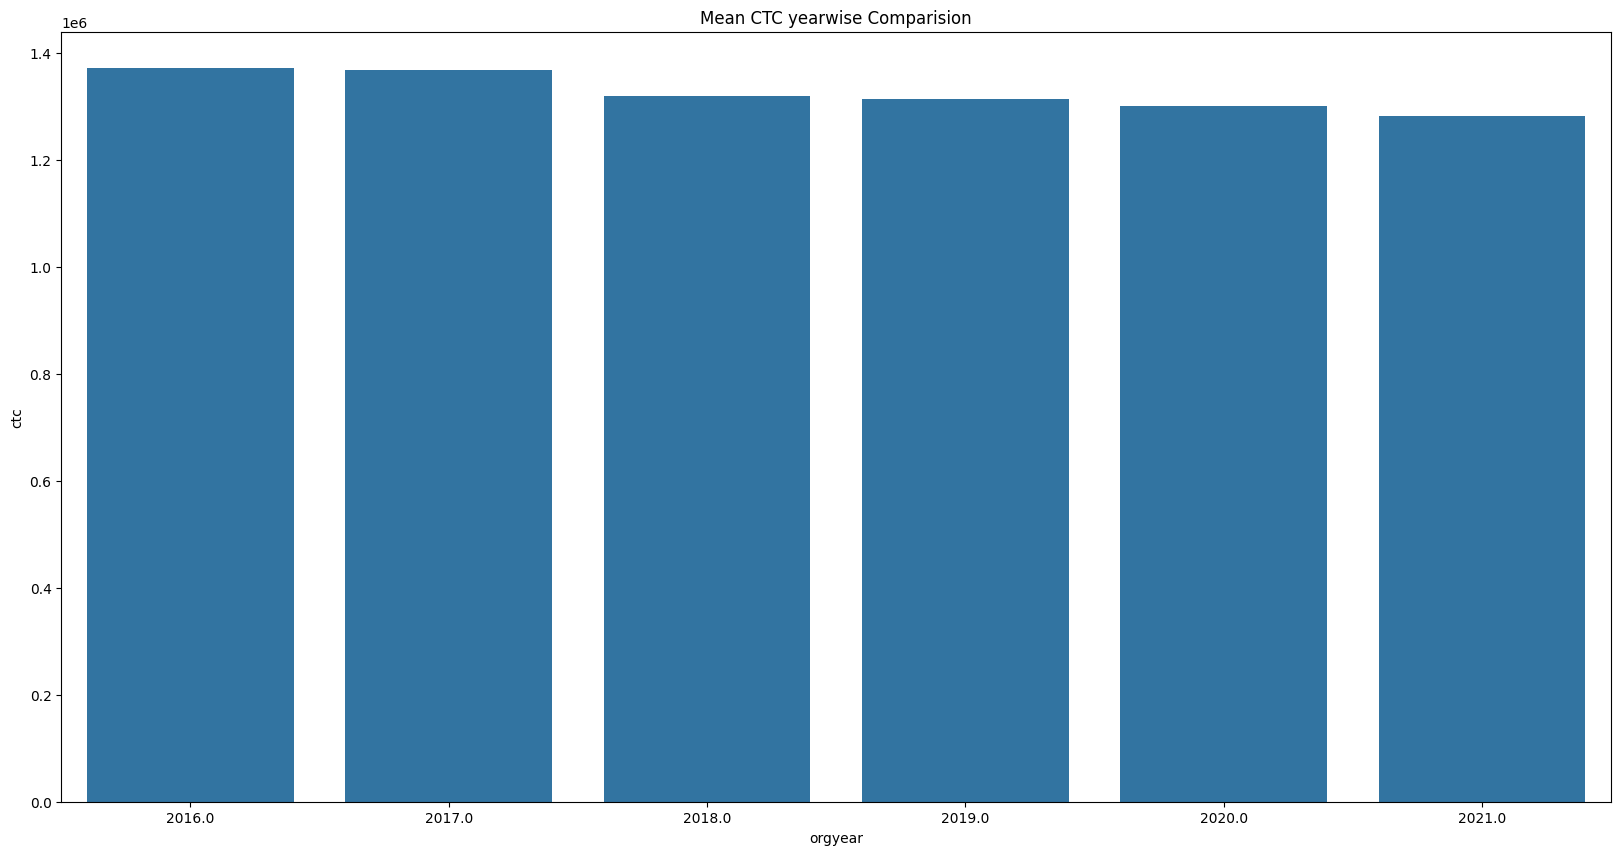

In [ ]:
tmp = dftmp.copy()

tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['orgyear']).mean(numeric_only=True)['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,10))
sns.barplot(data=tmp,y='ctc',x='orgyear').set(title="Mean CTC yearwise Comparision")
plt.show()

#### Manual Clustering

In [ ]:
dateda = dftmp.copy()

In [ ]:
grp = ['company_hash','job_position','YoE']
data_tmp1 = dateda.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = dateda.merge(data_tmp1[['company_hash', 'job_position', 'YoE', 'mean ctc']],on=['company_hash', 'job_position', 'YoE'],how='left')



col1 = 'ctc'
col2 = 'mean ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Designation'] = np.select(conditions, choices, default=np.nan)

In [ ]:
grp = ['company_hash','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [ ]:
grp = ['company_hash']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean3 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [ ]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

<b>Top 10 employees (earning more than most of the employees in the company) - Tier 1 </b>

In [ ]:
datatmp[datatmp['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
14508,57d94bc528dd63c4bbe8395b8e4f445a6a408d2bba098c...,3700000.0,1.121793e+06
2084,0bf9a65bba484fe9adaf30153b7c31f5d7fd1607118349...,3600000.0,1.034193e+06
31949,c2f841f00444bd42cff82d7e0bcd2df50d436231362d31...,3600000.0,1.062935e+06
928,05d40d5c22cdf3ac3605b3e30b4fb110d7f047c07d42b5...,3700000.0,1.217565e+06
7175,2af40c7f866e0bb44c3f93a65620b3425d636befc5d9f5...,3600000.0,1.118718e+06
23519,8eededdd0e028910969b47134304785522f962112c1097...,3660000.0,1.179167e+06
13973,54e3dc188722e7245d101a4009b2c6dfac4ac305a60b73...,3600000.0,1.120833e+06
24688,9633393d2d99fd0f1d04a4bbd51ce71abc6c9a52ad9723...,3700000.0,1.255709e+06
10731,40e6b266f94ac09475e857691d075780a1f44a77714d45...,3500000.0,1.062935e+06
40666,f67ae342b7431f7ab05eca998d904647b02711538aa839...,3750000.0,1.313158e+06


<b>Top 10 employees of data science in each company earning more than their peers - Class 1</b>

In [ ]:
# List of data science related job positions (you can adjust this list as needed)
data_science_positions = ['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']

# Filter for data science positions and Class 1 employees
tmp = datatmp[
    (datatmp['job_position'].isin(data_science_positions)) &
    (datatmp['Class'] == 1)
].copy()

# Sort by the difference in CTC within their class and display the top 10 for each company
# We need to group by company_hash and then select the top 10 within each group, sorted by diff_class ascending
tmp = tmp.sort_values(['company_hash', 'diff_class'], ascending=[True, True])
top_10_per_company = tmp.groupby('company_hash').head(10)

display(top_10_per_company[['email_hash', 'ctc', 'mean2 ctc', 'company_hash', 'job_position', 'diff_class']])

,email_hash,ctc,mean2 ctc,company_hash,job_position,diff_class
36456,ddd9683a58865398ed934ee7faeb0825e515f2fe3cdaad...,2500000.0,2.325000e+06,247Vx,Data Scientist,1.750000e+05
8147,312427e90421d0fa2ad12b47b33cac872026635e5340e6...,1550000.0,1.525000e+06,Abx Exzvzwt Ucn Rna,Data Scientist,2.500000e+04
22736,8a1e6a36db44c5ed8abe45ae0889577b2454e9025e7079...,2350000.0,1.471429e+06,Adw Ntwyzgrgsj,Data Scientist,8.785714e+05
19223,74aaf8eb0536ecc80e60fbfd706c07075f768657b4ae84...,2790000.0,1.471429e+06,Adw Ntwyzgrgsj,Data Scientist,1.318571e+06
13068,4f5373e5c3b2201e47ec6fc48c6595ca45b2fcd7a1935a...,1500000.0,1.336667e+06,Adw Ntwyzgrgsxto,Data Scientist,1.633333e+05
...,...,...,...,...,...,...
2111,0c25f5d183526e9731c9b83d0dab190d1edaa99ccfadeb...,2100000.0,1.225000e+06,Zvsvqqg,Data Scientist,8.750000e+05
33368,cb5ace38902a480048a079ca0af6a1d3793f9735f51953...,1500000.0,1.272000e+06,Zvz,Data Scientist,2.280000e+05
17464,69e06e73194a07ece2d03bc269d4c2eaf91c63fadc1f3a...,1860000.0,1.272000e+06,Zvz,Data Scientist,5.880000e+05
19298,751b1fb94f9054ecc14b44ebf91c3cbd92a47ea0194492...,3000000.0,1.613333e+06,Zxtrotz,Data Scientist,1.386667e+06


<b> Bottom 10 employees of data science in each company earning less than their peers - Class 3</b>

In [ ]:
# List of data science related job positions (you can adjust this list as needed)
data_science_positions = ['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']

# Filter for data science positions and Class 3 employees
tmp = datatmp[
    (datatmp['job_position'].isin(data_science_positions)) &
    (datatmp['Class'] == 3)
].copy()

# Sort by the difference in CTC within their class and display the bottom 10 for each company
# We need to group by company_hash and then select the bottom 10 within each group
tmp = tmp.sort_values(['company_hash', 'diff_class'], ascending=[True, True])
bottom_10_per_company = tmp.groupby('company_hash').head(10)

display(bottom_10_per_company[['email_hash', 'ctc', 'mean2 ctc', 'company_hash', 'job_position', 'diff_class']])

,email_hash,ctc,mean2 ctc,company_hash,job_position,diff_class
32004,c35054c043f6a02da3e6f142fbcb095f8145eb521137ff...,2150000.0,2.325000e+06,247Vx,Data Scientist,-175000.000000
9788,3aef83f2dddebbd9ffadfe2e42ad783a04b2607a55ebc1...,1500000.0,1.525000e+06,Abx Exzvzwt Ucn Rna,Data Scientist,-25000.000000
3450,1443f6d836c4dc24a7a79f7f81702e6b684abdd22ea50e...,800000.0,1.471429e+06,Adw Ntwyzgrgsj,Data Scientist,-671428.571429
40829,f77930e695dabbd49c7e2dc1d9cfe96c1d3b4808418c65...,850000.0,1.471429e+06,Adw Ntwyzgrgsj,Data Scientist,-621428.571429
16033,60e05ba7d60e8215da9a66938feba5f696ec5ea75b802d...,1120000.0,1.471429e+06,Adw Ntwyzgrgsj,Data Scientist,-351428.571429
...,...,...,...,...,...,...
17092,676a82bf884e26700fa2d67b24e175c365019999c8de6a...,1000000.0,1.272000e+06,Zvz,Data Scientist,-272000.000000
33047,c9807e5aca84ae19908f608511e19e7f2a8ccb9b3563fe...,1200000.0,1.272000e+06,Zvz,Data Scientist,-72000.000000
5602,2182cd4f16b2a915d6c53f901f9911bb6b3b22caaaa0ae...,750000.0,1.613333e+06,Zxtrotz,Data Scientist,-863333.333333
7259,2b7979bb62110fbb5e97f3f7f25d79f102536d3b84d538...,1090000.0,1.613333e+06,Zxtrotz,Data Scientist,-523333.333333


<b> Bottom 10 employees (earning less than most of the employees in the company)- Tier 3</b>

In [ ]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
1261,077fd3f95d8dbf89c112a8eca6601db3729f51b53b57a0...,720000.0,2.429466e+06
6943,2948313c61f5bbc93aeff300b560a162d2be6598642f1e...,760000.0,2.420000e+06
1279,07928c25cd4d0eae7eb7fcde594e426d48aecf74059660...,800000.0,2.429466e+06
11014,42b28ef7a167fcc04930a4b17bfcf833cdf50cd7e27e4f...,850000.0,2.475000e+06
40411,f4e771a4aecacbbfff03fddc71a19b49b820aacd41da75...,750000.0,2.373722e+06
27455,a725ffe325750a095192dec46dbaa75ccff2b897182289...,800000.0,2.420000e+06
2626,0f1bb449492b30b177bf5157093f4b830d433d7ac1719c...,740000.0,2.337400e+06
22619,8969b3943b8e5d77bcca59a1f206078eb2ea64a42f61d0...,850000.0,2.429466e+06
10587,3fe8ad204cd945a26daef1bd60c15432a0bad4038d4c77...,820000.0,2.390875e+06
24580,9585ac6449b2ffe63481274a83971b72ffa0effe35731e...,1000000.0,2.566667e+06


Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
# Assuming 'X' department and 'Tier X' refer to specific values or lists of values
# You can replace the example lists with the actual values you are interested in.

# Example lists for filtering (replace with your actual values)
target_companies = ['Qhmqxp Xzw', 'Ozvuatvr']  # Example company hashes
target_job_positions = ['Data Scientist', 'Backend Engineer']  # Example job positions
target_yoe = [5.0, 6.0, 7.0]

tmp = datatmp.copy()

# Filter by company, job position, and years of experience
tmp = tmp[
    (tmp['company_hash'].isin(target_companies)) &
    (tmp['job_position'].isin(target_job_positions)) &
    (tmp['YoE'].isin(target_yoe))
]

# Filter for employees earning more than their peers (Tier 1)
tmp = tmp[tmp['Tier'] == 1]

# Sort by the difference in CTC and display the top 10
display(tmp.sort_values('diff_tier', ascending=False).head(10)[['email_hash', 'ctc', 'mean3 ctc', 'company_hash', 'job_position', 'YoE']])

,email_hash,ctc,mean3 ctc,company_hash,job_position,YoE
21371,81b3541e030b0c0be96515d3afd04ba0b715ead9799458...,2200000.0,1.521823e+06,Ozvuatvr,Backend Engineer,6.0
26783,a33df1471342f40a3a48d4d175c8f6beb6263736359b68...,2100000.0,1.521823e+06,Ozvuatvr,Backend Engineer,5.0
37217,e217ede537fdfdce91ae6f59f8b126a8ac0604175618c4...,1900000.0,1.521823e+06,Ozvuatvr,Backend Engineer,5.0
7823,2f0649e1dce17c667d856f0ed57ad3cc5b335929a2d12d...,1850000.0,1.521823e+06,Ozvuatvr,Backend Engineer,7.0
1168,06fafba256b01a40819e49954fc1ed9a62bc643a1a8bd0...,1800000.0,1.521823e+06,Ozvuatvr,Backend Engineer,5.0
14561,581e92bf84d0ec5324fb274eaa19e2bbbb9ebb56f9aaf5...,1800000.0,1.521823e+06,Ozvuatvr,Backend Engineer,5.0
30343,b8ac9e16d22e4728886af639ee80ed92491e30dc4db7df...,1800000.0,1.521823e+06,Ozvuatvr,Backend Engineer,6.0
15525,5debf22f609c6f7c395befe8305b685c98b668ff6d668a...,1764999.0,1.521823e+06,Ozvuatvr,Backend Engineer,6.0
18732,718e375ec866c17361bfc89f2ab1d2e347601b0e4e36af...,1700000.0,1.521823e+06,Ozvuatvr,Backend Engineer,6.0
2883,10b638d15e15cc9512a5c736c7266eea4d170adb9062f7...,1600000.0,1.521823e+06,Ozvuatvr,Backend Engineer,5.0


<b> Top 10 companies (based on their CTC)</b>

In [ ]:
# Define a custom aggregation function to calculate the mean of 'ctc'
def mean_ctc(x):
    return x['ctc'].mean()

datatmp.groupby('company_hash').apply(mean_ctc).reset_index(name='ctc').sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

,company_hash,ctc
10248,Xzabgztj,3750000.0
4226,Nvqstn Xzaxv Ucn Rna,3750000.0
4512,Obvqntz Ouvwto,3720000.0
7744,Utqoutwnxct Ygouxnvrxnj,3710000.0
1654,Egwho Tahbvnxwo,3700000.0
7213,Tqgo Xzntqzvnxgzvr Btaxv Rna,3700000.0
7227,Tqxwoogz Xzaxv Rna,3700000.0
4347,Nyghsnougn,3700000.0
4454,Nyxzprxzp Ohuurj Wyvxz Otqcxwto,3700000.0
10582,Xzonxnhnt Ge Bvzvstbtzn,3700000.0


In [ ]:
list(datatmp.groupby('company_hash').apply(mean_ctc).reset_index(name='ctc').sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]['company_hash'])

['Xzabgztj',
 'Nvqstn Xzaxv Ucn Rna',
 'Obvqntz Ouvwto',
 'Utqoutwnxct Ygouxnvrxnj',
 'Egwho Tahbvnxwo',
 'Tqgo Xzntqzvnxgzvr Btaxv Rna',
 'Tqxwoogz Xzaxv Rna',
 'Nyghsnougn',
 'Nyxzprxzp Ohuurj Wyvxz Otqcxwto',
 'Xzonxnhnt Ge Bvzvstbtzn']

<b> Top 2 positions in every company (based on their CTC)</b>

In [ ]:
tmp = datatmp[datatmp['job_position'] != 'na'].copy()

# Define a custom aggregation function to calculate the mean of 'ctc'
def mean_ctc(x):
    return x['ctc'].mean()

tmp = tmp.groupby(['company_hash','job_position']).apply(mean_ctc).reset_index(name='ctc').sort_values(['company_hash','ctc']).reset_index()
tmp = tmp.groupby('company_hash').head(2)[['company_hash','job_position']]
tmp

,company_hash,job_position
0,01 Ojztqsj,Frontend Engineer
1,1 Jtvq,Backend Engineer
2,1001 Vuuo,Frontend Engineer
3,100Uxzo,Engineering Intern
4,123Ongqto,Backend Engineer
...,...,...
18236,Zxzvzxjv Sqghu,Engineering Leadership
18237,Zyuw Rxbxnta,Frontend Engineer
18238,Zyvzwt Wgzohrnxzs Tzsxzttqo,Frontend Engineer
18239,Zz,Other


<b> Top 2 positions in top Paying companies</b>

In [ ]:
# Get the list of top paying companies
# We can reuse the logic from cell tOKHTyAKj9kL to get the top companies
def mean_ctc(x):
    return x['ctc'].mean()

top_companies_df = datatmp.groupby('company_hash').apply(mean_ctc).reset_index(name='ctc').sort_values('ctc',ascending=False).head(10)
top_companies_list = top_companies_df['company_hash'].tolist()

# Filter the main DataFrame to include only data from top companies
tmp = datatmp[datatmp['company_hash'].isin(top_companies_list)].copy()

# Remove rows where job_position is 'na'
tmp = tmp[tmp['job_position'] != 'na'].copy()

# Find the top 2 positions within these top companies based on mean CTC
tmp = tmp.groupby(['company_hash','job_position']).apply(mean_ctc).reset_index(name='ctc').sort_values(['company_hash','ctc'], ascending=[True, False]).reset_index()
tmp = tmp.groupby('company_hash').head(2)[['company_hash','job_position', 'ctc']]

display(tmp)

,company_hash,job_position,ctc
0,Egwho Tahbvnxwo,FullStack Engineer,3700000.0
1,Nvqstn Xzaxv Ucn Rna,Program Manager,3750000.0
2,Nyghsnougn,Other,3700000.0
3,Nyxzprxzp Ohuurj Wyvxz Otqcxwto,Data Scientist,3700000.0
4,Obvqntz Ouvwto,Backend Engineer,3720000.0
5,Tqgo Xzntqzvnxgzvr Btaxv Rna,Devops Engineer,3700000.0
6,Tqxwoogz Xzaxv Rna,Program Manager,3700000.0
7,Utqoutwnxct Ygouxnvrxnj,Backend Engineer,3710000.0
8,Xzabgztj,Senior Director of Engineering,3750000.0
9,Xzonxnhnt Ge Bvzvstbtzn,Product Manager,3700000.0


Preparing data for training model(Imputation/Scaling)

In [ ]:
data = dateda.copy()
data

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_null,orgyear_null,job_position_null,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000.0,Backend Engineer,2019.0,False,False,False,7.0,0.008040,2297.947228
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,False,False,False,17.0,0.000072,1375.465580
5,00022dc29c7f77032275182b883d4f273ea1007aefc437...,7782,Xzeqvwrgha Ntwyzgrgsxto,2016.0,750000.0,Frontend Engineer,2019.0,False,False,False,3.0,0.000036,586.661202
6,00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b7...,30543,Ocu Xnivz Gbvz,2011.0,2300000.0,Other,2021.0,False,False,False,10.0,0.000012,1231.421993
7,00037a2e4fcfe2830d91270102aaaf105a324a3ce17075...,33808,Ko,2012.0,1800000.0,SDET,2021.0,False,False,False,9.0,0.000928,206.964718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82952,fff9303dc6501cda286e16f30caa07c62300e98981d2c7...,72051,Xzeguxzt Wgzohrnvzwj Ucn Rxbxnta,2015.0,800000.0,FullStack Engineer,2020.0,False,False,False,5.0,0.000012,1375.465580
82953,fff984ee0518005c3c0385f1900ff6bd3565ce0690cd58...,37552,Vagmt,2016.0,2700000.0,FullStack Engineer,2018.0,False,False,False,2.0,0.005485,1375.465580
82954,fff9d3463b21cf1b552a5deb4d7d8af2c5ce7ebcb1f37e...,49612,Mrgwp Stbxzx,2013.0,1000000.0,FullStack Engineer,2021.0,False,False,False,8.0,0.000012,1375.465580
82955,fffa3a7b849802580a1972f11d192b43ff1c871bb43002...,79890,Nvnv Wgzohrnvzwj Otqcxwto,2014.0,1800000.0,Backend Engineer,2019.0,False,False,False,5.0,0.045130,2297.947228


<b>Transforming ctc feature using log function</b>

In [ ]:
data['ctc_log'] = np.log2(data['ctc'])

<b> Columns like ['normalized_company_name','job_position','email_hash','Unnamed: 0','company'] are text.<br> We can't use them during imputation, so we'll remove these columns</b>

In [ ]:
drop_cols = ['normalized_company_name','job_position','email_hash','Unnamed: 0','company', 'company_hash']
for i in drop_cols:
    # Removed try-except to ensure error is surfaced if column doesn't exist
    if i in data.columns:
        data.drop([i],axis=1,inplace=True)

In [ ]:
data.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'company_hash_null',
       'orgyear_null', 'job_position_null', 'YoE', 'company_hash_encode',
       'job_position_encode', 'ctc_log'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42214 entries, 0 to 82959
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   orgyear              42188 non-null  float64
 1   ctc                  42214 non-null  float64
 2   ctc_updated_year     42214 non-null  float64
 3   company_hash_null    42214 non-null  bool   
 4   orgyear_null         42214 non-null  bool   
 5   job_position_null    42214 non-null  bool   
 6   YoE                  42188 non-null  float64
 7   company_hash_encode  42214 non-null  float64
 8   job_position_encode  42214 non-null  float64
 9   ctc_log              42214 non-null  float64
dtypes: bool(3), float64(7)
memory usage: 2.7 MB


<b>Summary Statistics</b>

In [ ]:
data.describe()

,orgyear,ctc,ctc_updated_year,YoE,company_hash_encode,job_position_encode,ctc_log
count,42188.000000,4.221400e+04,42214.000000,42188.000000,42214.000000,42214.000000,42214.000000
mean,2014.261259,1.499513e+06,2019.708462,5.447378,0.003365,1241.838868,20.377596
std,4.149939,6.984189e+05,1.253721,4.071312,0.007786,824.943772,0.617669
min,1970.000000,7.080000e+05,2015.000000,0.000000,0.000012,0.120539,19.433390
25%,2012.000000,9.500000e+05,2019.000000,3.000000,0.000036,323.043358,19.857568
50%,2015.000000,1.300000e+06,2020.000000,5.000000,0.000374,1375.465580,20.310080
75%,2017.000000,1.850000e+06,2021.000000,7.000000,0.002230,2297.947228,20.819094
max,2021.000000,3.750000e+06,2021.000000,51.000000,0.045130,2297.947228,21.838459


In [ ]:
data.isna().sum()

,0
orgyear,26
ctc,0
ctc_updated_year,0
company_hash_null,0
orgyear_null,0
job_position_null,0
YoE,26
company_hash_encode,0
job_position_encode,0
ctc_log,0


Training Model

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Kmeans Clustering

<div style="font-family:verdana; word-spacing:1.5px;">
    Standardizing data before applyting unsupervised algorithm
    <br><br>
<p>


In [ ]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform"))])
pipe_knn_5 = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])
pipe = Pipeline([('scaler', StandardScaler()), ('simple_imputer',  SimpleImputer(missing_values=np.nan, strategy='mean'))])
pipe_knn_pca = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform")),('pca',PCA(n_components=8))])
pipe_unscaled = Pipeline([('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])

<b> Finding optimal num of clusters using Elbow method</b>

Running for  KNN Immputation


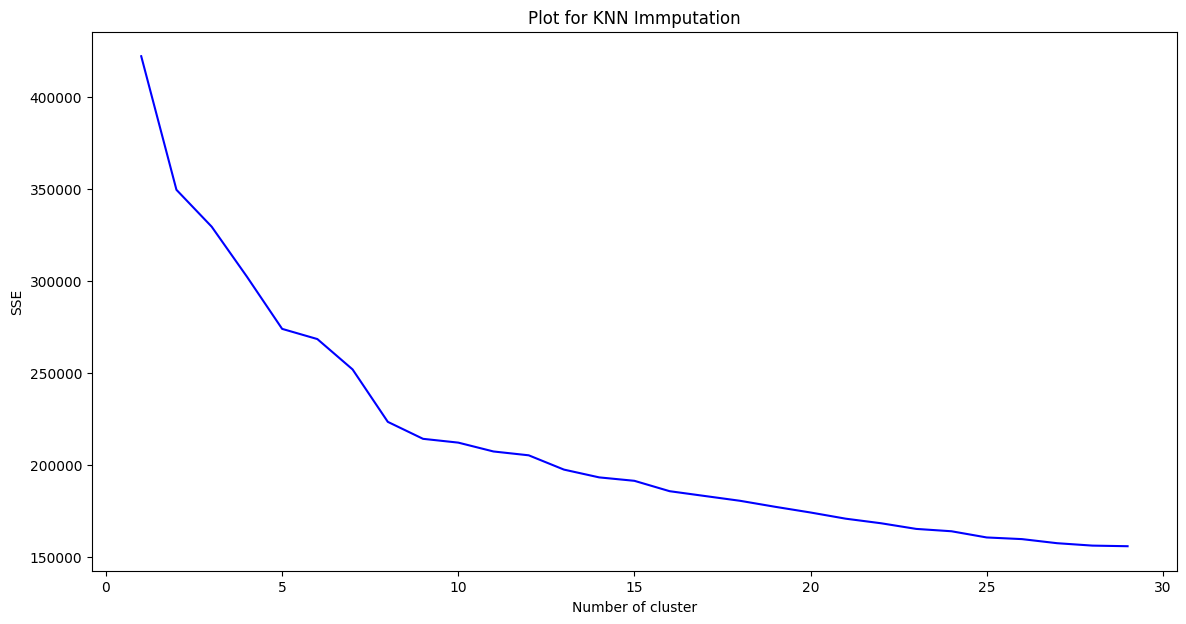

Running for  KNN Imputation with (default) 5 neighbours


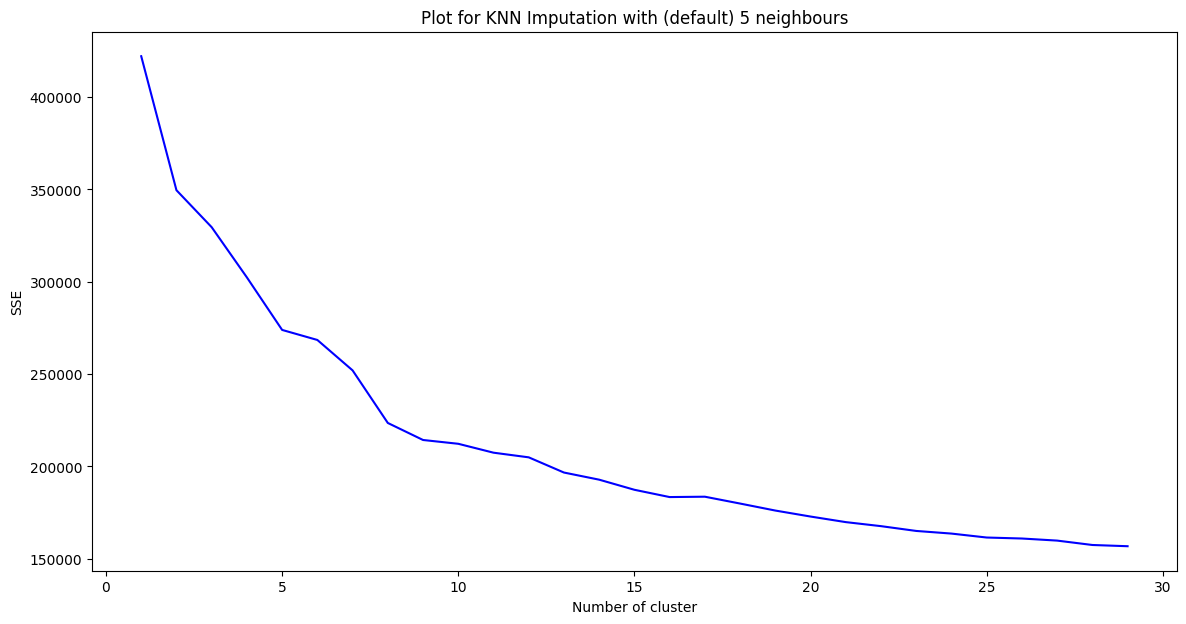

Running for  Mean Imputation 


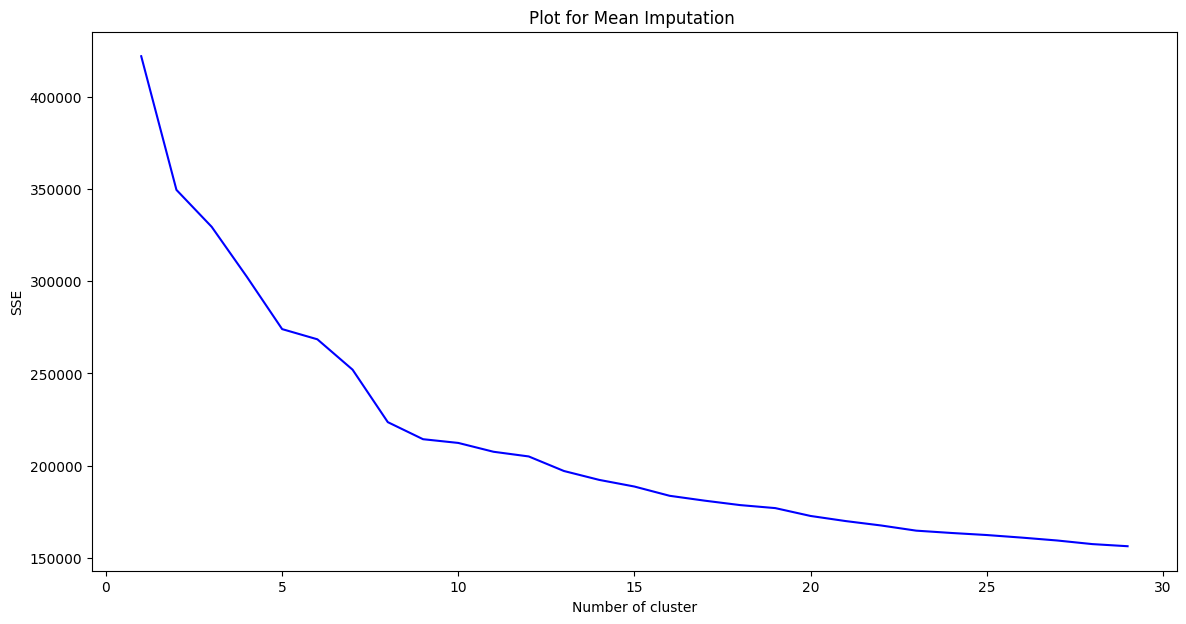

Running for  KNN Immputation + PCA


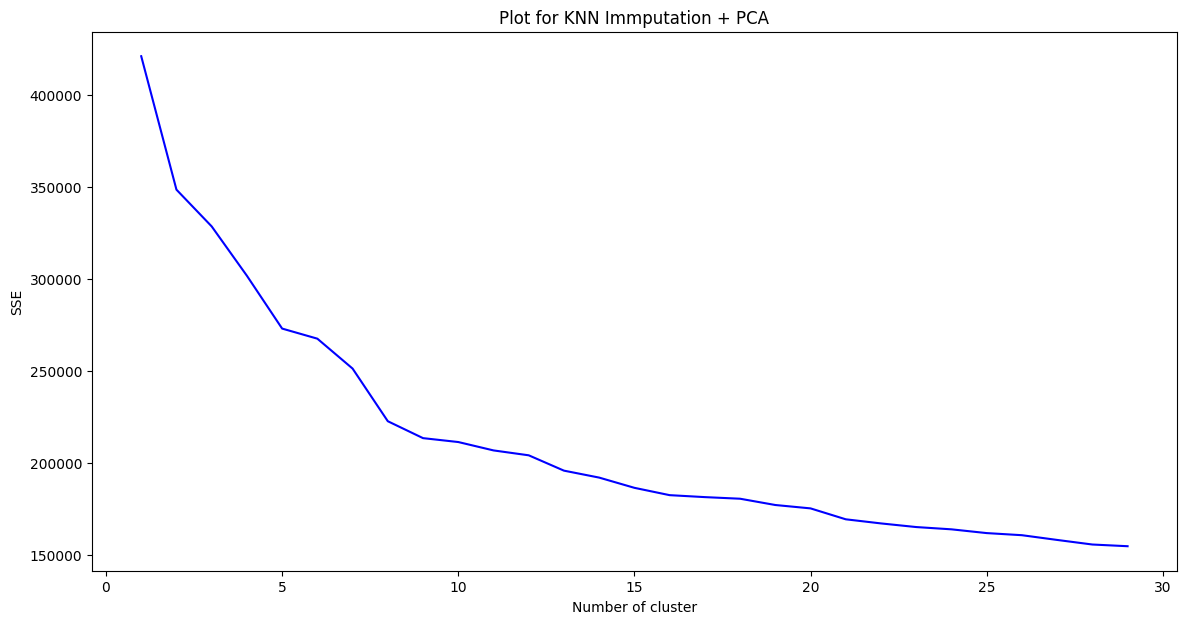

Running for  KNN Imputation Unscaled data


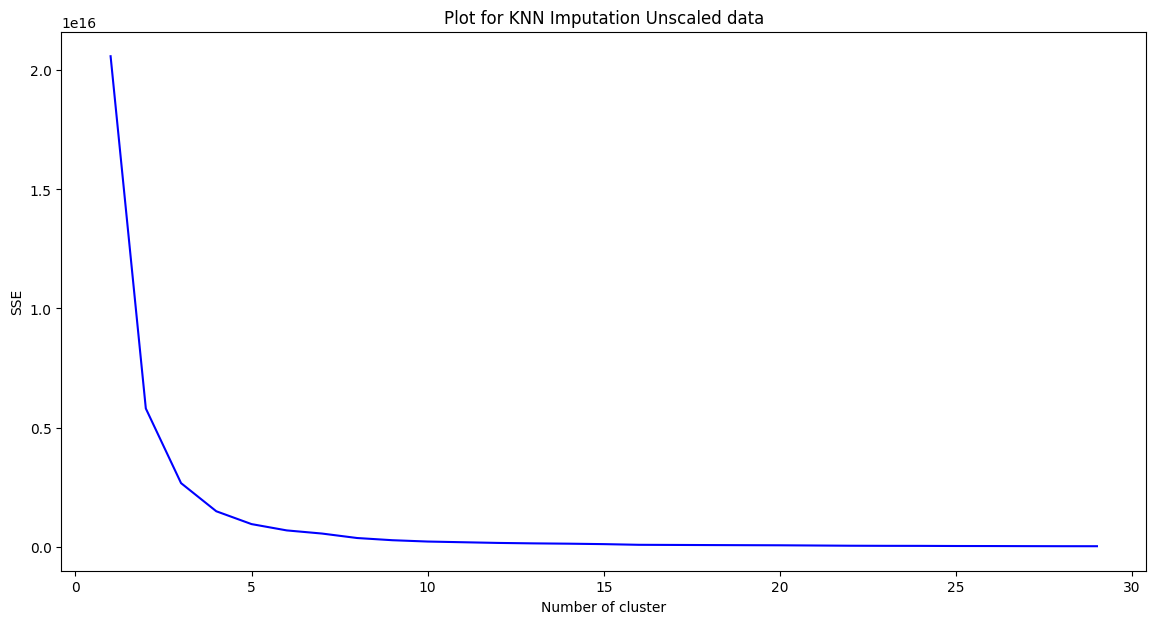

In [ ]:
for name,pipeline in [('KNN Immputation',pipe_knn),('KNN Imputation with (default) 5 neighbours',pipe_knn_5),('Mean Imputation ',pipe),
                      ('KNN Immputation + PCA', pipe_knn_pca),('KNN Imputation Unscaled data',pipe_unscaled )]:

    # Exclude the 'company_hash' column before passing to the pipeline
    X = pipeline.fit_transform(data)
    X = pd.DataFrame(X)
    if "PCA" not in name :
        # Adjust column names after dropping 'company_hash'
        X.columns= data.columns

    sse = {}
    #sil_score = {}
    print("Running for ",name)
    for k in range(1, 30):
        #print('K :',k)
        kmeans = MiniBatchKMeans(init="k-means++",n_clusters=k,
                              random_state=0, n_init='auto').fit(X)
        label = kmeans.labels_
        # data["clusters"] = label # Avoid modifying the original 'data' DataFrame in the loop
        #print(data["clusters"])
        sse[k] = kmeans.inertia_

        #sil_score[k] = silhouette_score(X, label, metric='euclidean')

    plt.figure(figsize=(14,7))
    plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Plot for "+name)
    plt.show()

<h2><b>Insights</b></h2>

<table>
<tbody>
<tr style="height: 23px;">
<td style="height: 23px;">Model</td>
<td style="height: 23px;">n_clusters</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Immputation</td>
<td style="height: 23px;">&nbsp;16</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Imputation with (default) 5 neighbours</td>
<td style="height: 23px;">&nbsp;20</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">Mean Imputation</td>
<td style="height: 23px;">&nbsp;25</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Immputation + PCA</td>
<td style="height: 23px;">&nbsp;21</td>
</tr>
<tr style="height: 23.5px;">
<td style="height: 23.5px;">KNN Imputation Unscaled data</td>
<td style="height: 23.5px;">&nbsp;5</td>
</tr>
</tbody>
</table>
<br>
<br>
<b> Number of clusters is around 16-20 for scaled data, while around 5 for unscaled data</b>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

## Agglomerative Clustering

In [ ]:
tmp = X.sample(frac=0.2)

tmp.shape

(8443, 10)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram

    dendrogram(linkage_matrix, **kwargs)

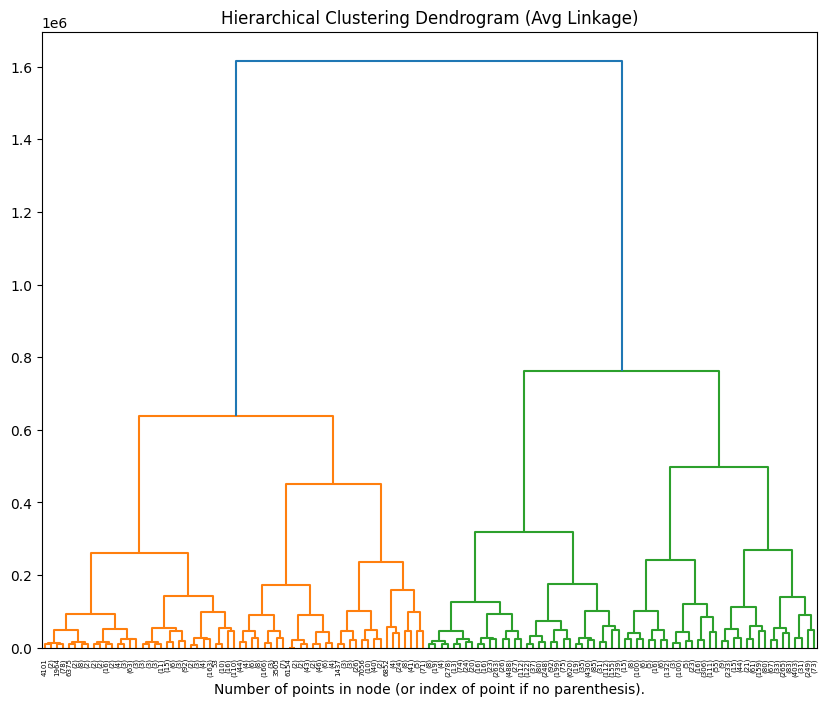

In [ ]:
model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(10, 8))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

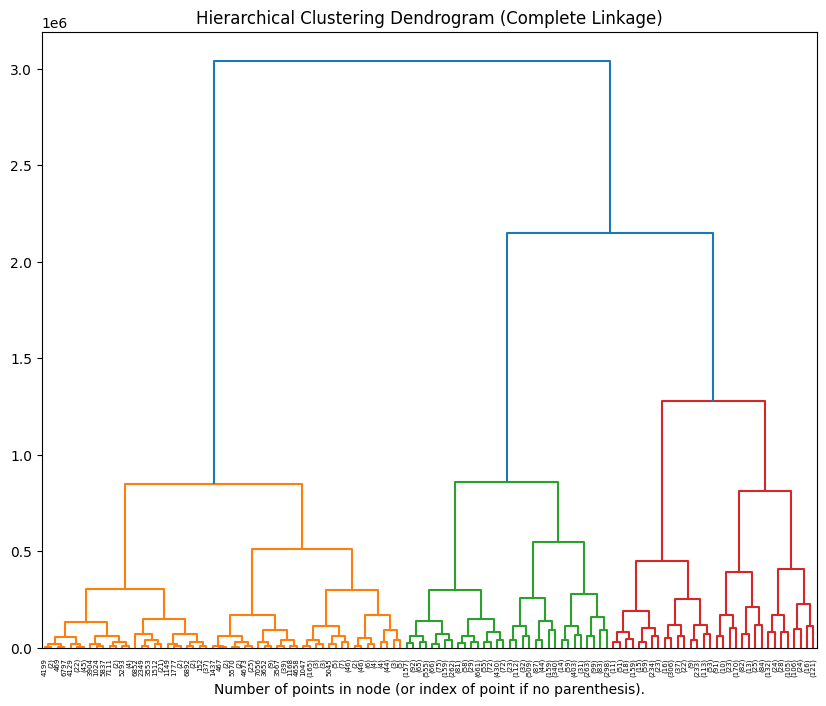

In [ ]:
model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='complete').fit(tmp)

plt.figure(figsize=(10, 8))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=17, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(10, 8))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

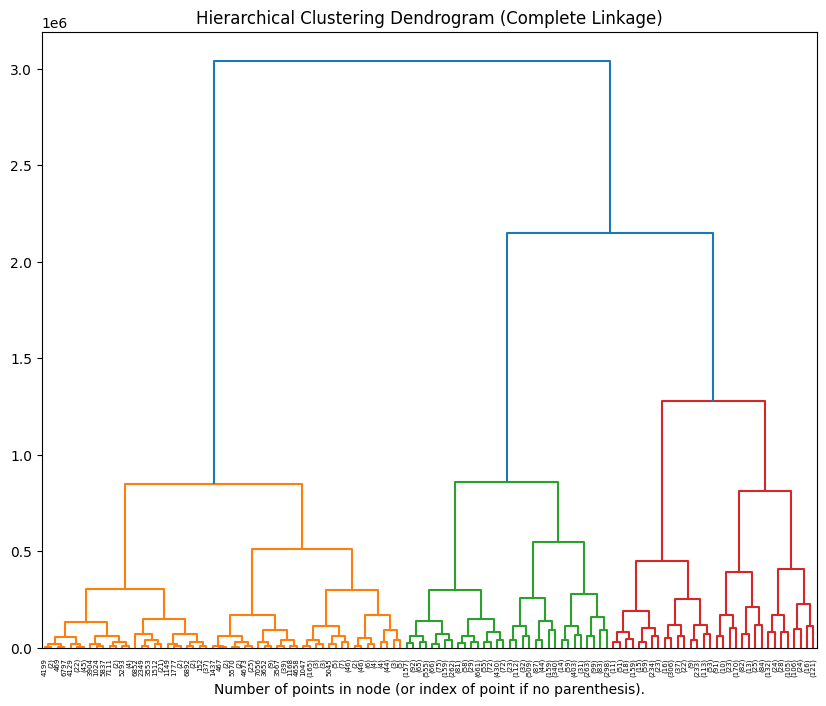

In [ ]:
model = AgglomerativeClustering(n_clusters=17, compute_distances=True,linkage='complete').fit(tmp)

plt.figure(figsize=(10, 8))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=5, compute_distances=True,linkage='single').fit(tmp)

plt.figure(figsize=(10, 8))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<h2><b>Insights</b></h2>


<br><br>
<b> Number of clusters around 2 seems optimal in most cases, while in last plot(with single linkage) number of clusters around 16 is optimal</b>

## Insignts/Recommendations

<b>Insights</b>

<ul>
    <li> Top Paying job titles include 'Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer' and
 'FullStack Engineer'.
 <li> Top paying company hash are 'Ovrnoxat Ntwyzgrgsj',
 'Tqxwoogz Qa Mvzsvrgqt',
 'Zvsqv Cxoxgz Xzaxv Uqxcvnt Rxbxnta',
 'Ertwp',
 'Vrjgoyv Ntwyzgrgsj Wgzohrnvzwj Otqcxwt',
 'Owm',
 'Fttduvz Wgzohrnvzn',
 'Fvrbvqn Srgmvr Ntwyzgrgsj Ogrhnxgzo',
 'Xaew Mvzp Rna',
 'Ihva Vzvrjnxd'
          <li> Avg CTC seems to be decreasing with year.

 </ul>

<b>Recommendations</b>

<ul>
<li> Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.
<li> Freshers who want best CTC should aim for top paying companies.
</ul>
